In [1]:
# import the required packages
import numpy as np
import pandas as pd
import re
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from gensim.parsing.preprocessing import remove_stopwords
from mlxtend.preprocessing import TransactionEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

# Problem1

## 1. Text Data Preprocessing

### 1.1 Load the Text Data

In [2]:
#read the csv file
dat = pd.read_csv('bbc-text.csv')
#show the first 5 row
dat.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
#show the info for the respective columns
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [4]:
dat['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [5]:
all_stopwords = gensim.parsing.preprocessing.STOPWORDS

### 1.2 Cleanse the Text Data

In [6]:
def pre_process(content):
    
    content = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', content)
    # lowercase
    content=content.lower()
    
    #remove tags
    content=re.sub("</?.*?>"," <> ",content)
    
    # remove special characters and digits
    content=re.sub("(\\d|\\W|_)+"," ",content)
    
    #remove stopwords
    content = remove_stopwords(content)
    words = [word for word in content.split() if word.lower() not in stopwords]
    content = " ".join(words)
    
    return content

#removing the stop words
def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)

#load a set of stop words
stopwords=get_stop_words("stopwords.txt")

text_processed = dat['text'].apply(lambda x:pre_process(x))

In [7]:
stopwords

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'among',
           'an',
           'and',
           'another',
           'any',
           'anybody',
           'anyone',
           'anything',
           'anywhere',
           'are',
           'area',
           'areas',
           'around',
           'as',
           'ask',
           'asked',
           'asking',
           'asks',
           'at',
           'away',
           'b',
           'back',
           'backed',
           'backing',
           'backs',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'been',
           'before',
           'began',
           'behind',
           'being',
  

In [8]:
dat = dat.assign(processedText=text_processed)

### Exporting my Clean Data

In [9]:
#dat.to_csv('CleanedDataFrame.csv',index=False)

# 

In [10]:
dat.head()

,category,text,processedText
0,tech,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books worldcom boss bernie ...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester rushed bi...
3,sport,yeading face newcastle in fa cup premiership s...,yeading newcastle fa cup premiership newcastle...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean raids box office ocean crime caper seque...


In [11]:
dat.values[1,2]

'worldcom boss left books worldcom boss bernie ebbers accused overseeing bn bn fraud accounting decisions witness told jurors david myers comments questioning defence lawyers arguing ebbers responsible worldcom phone company collapsed prosecutors claim losses hidden protect firm shares myers pleaded guilty fraud assisting prosecutors monday defence lawyer reid weingarten tried distance client allegations cross examination myers ebbers accounting decision aware myers replied ebbers accounting entry worldcom books weingarten pressed replied witness myers admitted false accounting entries request worldcom chief financial officer scott sullivan defence lawyers trying paint sullivan admitted fraud testify trial mastermind worldcom accounting house cards ebbers team looking portray affable boss admission pe graduate economist abilities ebbers transformed worldcom relative unknown bn telecoms giant investor darling late worldcom mounted competition increased telecoms boom petered firm finally

In [12]:
text_processed

0       tv future hands viewers home theatre systems p...
1       worldcom boss left books worldcom boss bernie ...
2       tigers wary farrell gamble leicester rushed bi...
3       yeading newcastle fa cup premiership newcastle...
4       ocean raids box office ocean crime caper seque...
                              ...                        
2220    cars pull retail figures retail sales fell jan...
2221    kilroy unveils immigration policy ex chatshow ...
2222    rem announce glasgow concert band rem announce...
2223    political squabbles snowball commonplace argue...
2224    souness delight euro progress boss graeme soun...
Name: text, Length: 2225, dtype: object

In [13]:
#apply breakdwon_text function to the processedText in dat
#text_pt = dat['processedText'].apply(lambda x:breakdown_text(x))

In [14]:
#add new col ['brokenDownProcessedText'] into the dat
#dat = dat.assign(brokenDownProcessedText=text_pt)

In [15]:
#not needed
#add all the words from all the text given in the csv file
#word_all = []
#for i in range(0,2225):
    #for word in text_pt[i]:
        #print(word)
        #word_all.append(word)    

In [16]:
#len(word_all)

### Meaning of Each Column
- Category = category of the text
- text = the original text in the csv file
- processedText = text without the special characters etc

In [17]:
text_processed.shape

(2225,)

### 1.3 Bag-of-Word

In [18]:
count_vect = CountVectorizer(max_df=0.15, max_features=5000)
text_counts = count_vect.fit_transform(text_processed.tolist())

In [19]:
sum_words = text_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [20]:
print('The highest frequency words:')
words_freq[:20]

The highest frequency words:


[('bn', 958),
 ('film', 890),
 ('music', 839),
 ('labour', 804),
 ('election', 662),
 ('party', 630),
 ('games', 622),
 ('england', 618),
 ('blair', 603),
 ('technology', 561),
 ('minister', 561),
 ('public', 557),
 ('mobile', 546),
 ('british', 542),
 ('tv', 525),
 ('european', 525),
 ('players', 524),
 ('sales', 494),
 ('plans', 486),
 ('half', 474)]

In [21]:
print('The lowest frequency words:') 
words_freq[-20:] 

The lowest frequency words:


[('venezuelan', 13),
 ('surveillance', 13),
 ('phonographic', 13),
 ('fixes', 13),
 ('verge', 13),
 ('roads', 13),
 ('billionaire', 13),
 ('purposes', 13),
 ('leslie', 13),
 ('ceremonies', 13),
 ('detain', 13),
 ('chaos', 13),
 ('assistance', 13),
 ('inbev', 13),
 ('franchise', 13),
 ('borussia', 13),
 ('macrovision', 13),
 ('leaked', 13),
 ('newton', 13),
 ('feta', 13)]

In [22]:
#print the all the words
count_vect.get_feature_names()

['aaas',
 'abandoned',
 'abc',
 'ability',
 'able',
 'abn',
 'abortion',
 'abroad',
 'absence',
 'absolute',
 'absolutely',
 'abuse',
 'abused',
 'ac',
 'academy',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accident',
 'acclaimed',
 'accompanied',
 'according',
 'account',
 'accounting',
 'accounts',
 'accurate',
 'accused',
 'accusing',
 'achieve',
 'achieved',
 'achievement',
 'achievements',
 'achieving',
 'acknowledged',
 'acquire',
 'acquisition',
 'act',
 'acting',
 'action',
 'actions',
 'active',
 'activist',
 'activists',
 'activities',
 'activity',
 'actor',
 'actors',
 'actress',
 'acts',
 'actually',
 'ad',
 'adam',
 'adams',
 'adapt',
 'adaptation',
 'adapted',
 'add',
 'adding',
 'addition',
 'additional',
 'address',
 'addresses',
 'adds',
 'adjusted',
 'administration',
 'admission',
 'admit',
 'admits',
 'admitted',
 'adopt',
 'adopted',
 'adoption',
 'ads',
 'adult',
 'adults',
 'advance',
 'advanced',
 'advantage',
 'adventure',
 'advertising'

In [23]:
feature_names=np.array(count_vect.get_feature_names())
len(count_vect.get_feature_names())

5000

In [24]:
df_textcount = pd.DataFrame(text_counts.toarray())

In [25]:
df_textcount

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.4 TF-IDF

In [26]:
tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)
text_tfidf = tfidf_transformer.fit_transform(text_counts)

In [27]:
tfidf_transformer.idf_

array([6.62851999, 5.81758977, 6.22305488, ..., 5.87474819, 5.81758977,
       5.99991133])

In [28]:
tfidf_transformer.idf_.shape

(5000,)

In [29]:
text_tfidf

<2225x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 206038 stored elements in Compressed Sparse Row format>

In [30]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['according' 'public' 'month' 'day' 'bn' 'based' 'called' 'british'
 'minister' 'international' 'hit' 'help' 'director' 'despite' 'plans'
 'half' 'london' 'european' 'record' 'start' 'money' 'seen' 'players'
 'future' 'spokesman' 'business' 'earlier' 'companies' 'britain' 'run'
 'saying' 'able' 'europe' 'times' 'biggest' 'taking' 'decision' 'lost'
 'team' 'recent' 'national' 'deal' 'industry' 'england' 'past' 'film'
 'life' 'service' 'lot' 'final' 'labour' 'january' 'technology'
 'executive' 'days' 'music' 'look' 'looking' 'following' 'games' 'action'
 'strong' 'major' 'growth' 'ahead' 'real' 'believe' 'michael' 'currently'
 'line' 'party' 'hard' 'little' 'president' 'held' 'election' 'december'
 'playing' 'played' 'services' 'office' 'current' 'david' 'figures' 'left'
 'firms' 've' 'include' 'announced' 'john' 'cut' 'support' 'analysts'
 'sunday' 'player' 'sales' 'key' 'tv' 'report' 'star']


In [31]:
pd.DataFrame(text_tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091717,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
max_value = text_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['savvy' 'navigate' 'specifications' 'sadly' 'status' 'types' 'constantly'
 'instant' 'informed' 'crimes' 'kinds' 'finnish' 'changing' 'maintaining'
 'reaching' 'enforce' 'purpose' 'katerina' 'globally' 'realistic']
Features with highest tfidf: 
['hague' 'brando' 'wmc' 'viacom' 'mitsubishi' 'copper' 'edwards' 'fiat'
 'qantas' 'boeing' 'beer' 'feta' 'mirza' 'mtv' 'mutu' 'dallaglio' 'ink'
 'uwb' 'commodore' 'ballet']


## 2. Text Data Understanding

### 2.1 Extract keywords using TF-IDF matrix

In [33]:
idx=0
doc = text_processed[idx]

tf_idf_vector=text_tfidf[idx]

In [34]:
word_freq_df = pd.DataFrame(words_freq)

In [35]:
word_freq_df.head()

,0,1
0,bn,958
1,film,890
2,music,839
3,labour,804
4,election,662


In [36]:
tf_idf_vector.shape

(1, 5000)

In [37]:
temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
temp

,feature_number,tf_idf
0,4960,0.046219
1,4924,0.045466
2,4922,0.117905
3,4886,0.033315
4,4871,0.046025
...,...,...
168,147,0.034626
169,82,0.053904
170,81,0.099452
171,53,0.054350


In [38]:
temp.sort_values('tf_idf', ascending = False, inplace = True)
temp

,feature_number,tf_idf
13,4682,0.422904
134,1186,0.191717
5,4868,0.169573
37,3907,0.165931
137,989,0.157878
...,...,...
153,597,0.029841
46,3626,0.029289
101,2091,0.028640
151,617,0.028392


In [39]:
topn = 10
results =[]

topkeys = []

In [40]:
for idx, doc in text_processed.items():
    #generate tf-idf for the given document
    tf_idf_vector=text_tfidf[idx]
    
    temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
    temp.sort_values('tf_idf', ascending = False, inplace = True)
    
    #use only topn items from vector
     
    topn_items = temp[:topn]

    tf_idf = []
    word = []
    topkey = []

    for index, row in topn_items.iterrows():
        fname = feature_names[int(row['feature_number'])]
        word.append(fname)
        tf_idf.append(round(row['tf_idf'], 3))

    result = dict(zip(word, tf_idf))
    topkey = word
    topkeys.append(topkey)
    results.append(result)

In [41]:
print(doc, '\n')

#result = dict(zip(word, tf_idf))
print(result)


souness delight euro progress boss graeme souness newcastle danger uefa cup heerenveen goal followed alan shearer strike earned win uefa cup obviously winning leg advantage aggregate victory goals minds players job goal bit nervous shearer goal moved jackie milburn club scoring record magpies souness beating record bearing decision retire season stay added struck ball power pace beat goalkeeper souness paid tribute laurent robert heart united attacking play half wide player future 

{'souness': 0.573, 'goal': 0.283, 'uefa': 0.265, 'cup': 0.17, 'graeme': 0.141, 'record': 0.141, 'goalkeeper': 0.134, 'retire': 0.13, 'nervous': 0.127, 'scoring': 0.125}


In [42]:
dat['keywords'] = results

In [43]:
dat = dat.assign(topKeysList=topkeys)
dat.head()

,category,text,processedText,keywords,topKeysList
0,tech,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...,"{'tv': 0.423, 'definition': 0.192, 'watch': 0....","[tv, definition, watch, satellite, content, br..."
1,business,worldcom boss left books alone former worldc...,worldcom boss left books worldcom boss bernie ...,"{'worldcom': 0.533, 'ebbers': 0.489, 'accounti...","[worldcom, ebbers, accounting, fraud, defence,..."
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester rushed bi...,"{'farrell': 0.581, 'leicester': 0.264, 'tigers...","[farrell, leicester, tigers, rugby, league, un..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading newcastle fa cup premiership newcastle...,"{'league': 0.239, 'west': 0.2, 'cup': 0.176, '...","[league, west, cup, united, drawn, newcastle, ..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean raids box office ocean crime caper seque...,"{'ocean': 0.49, 'sequel': 0.426, 'starring': 0...","[ocean, sequel, starring, box, roberts, office..."


In [44]:
dat['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [45]:
sport = dat.loc[dat['category'] == 'sport']
business = dat.loc[dat['category'] == 'business']
politics = dat.loc[dat['category'] == 'politics']
tech = dat.loc[dat['category'] == 'tech']
entertainment = dat.loc[dat['category'] == 'entertainment']
sport.head()

,category,text,processedText,keywords,topKeysList
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester rushed bi...,"{'farrell': 0.581, 'leicester': 0.264, 'tigers...","[farrell, leicester, tigers, rugby, league, un..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading newcastle fa cup premiership newcastle...,"{'league': 0.239, 'west': 0.2, 'cup': 0.176, '...","[league, west, cup, united, drawn, newcastle, ..."
7,sport,henman hopes ended in dubai third seed tim hen...,henman hopes dubai seed tim henman slumped str...,"{'henman': 0.624, 'rain': 0.328, 'seed': 0.261...","[henman, rain, seed, ljubicic, frustrating, du..."
8,sport,wilkinson fit to face edinburgh england captai...,wilkinson fit edinburgh england captain jonny ...,"{'wilkinson': 0.488, 'internationals': 0.272, ...","[wilkinson, internationals, injury, edinburgh,..."
14,sport,moya emotional after davis cup win carlos moya...,moya emotional davis cup win carlos moya descr...,"{'roddick': 0.401, 'moya': 0.369, 'clay': 0.30...","[roddick, moya, clay, davis, spain, beat, cup,..."


In [46]:
s_keylist = list(sport['topKeysList'])
s_top_df = pd.DataFrame(s_keylist)
s_top_df

,0,1,2,3,4,5,6,7,8,9
0,farrell,leicester,tigers,rugby,league,union,knee,andy,involved,saracens
1,league,west,cup,united,drawn,newcastle,brentford,sunderland,draw,premiership
2,henman,rain,seed,ljubicic,frustrating,dubai,straight,match,final,seal
3,wilkinson,internationals,injury,edinburgh,england,newcastle,captain,cup,saturday,saracens
4,roddick,moya,clay,davis,spain,beat,cup,seville,nadal,bit
...,...,...,...,...,...,...,...,...,...,...
506,registration,cup,legal,wednesday,courts,fresh,irish,original,appeal,meeting
507,owen,real,barcelona,scored,starting,goal,happy,league,victory,edu
508,manager,players,walter,managers,friendly,team,international,probably,opportunity,minutes
509,davies,ospreys,gloucester,wales,neath,contract,stay,summer,swansea,stade


In [47]:
business.head()

,category,text,processedText,keywords,topKeysList
1,business,worldcom boss left books alone former worldc...,worldcom boss left books worldcom boss bernie ...,"{'worldcom': 0.533, 'ebbers': 0.489, 'accounti...","[worldcom, ebbers, accounting, fraud, defence,..."
11,business,virgin blue shares plummet 20% shares in austr...,virgin blue shares plummet shares australian b...,"{'virgin': 0.651, 'blue': 0.549, 'profits': 0....","[virgin, blue, profits, airline, shares, budge..."
12,business,crude oil prices back above $50 cold weather a...,crude oil prices cold weather united europe pu...,"{'prices': 0.428, 'crude': 0.369, 'oil': 0.359...","[prices, crude, oil, barrel, opec, dollar, cut..."
15,business,s korean credit card firm rescued south korea ...,korean credit card firm rescued south korea la...,"{'lg': 0.483, 'card': 0.395, 'creditors': 0.30...","[lg, card, creditors, korea, debt, credit, bai..."
18,business,japanese banking battle at an end japan s sumi...,japanese banking battle japan sumitomo mitsui ...,"{'mitsubishi': 0.385, 'bank': 0.318, 'japan': ...","[mitsubishi, bank, japan, japanese, trillion, ..."


In [48]:
b_keylist = list(business['topKeysList'])
b_top_df = pd.DataFrame(b_keylist)
b_top_df

,0,1,2,3,4,5,6,7,8,9
0,worldcom,ebbers,accounting,fraud,defence,witness,bn,collapsed,boss,replied
1,virgin,blue,profits,airline,shares,budget,fall,reported,qantas,november
2,prices,crude,oil,barrel,opec,dollar,cut,stocks,demand,low
3,lg,card,creditors,korea,debt,credit,bail,collapse,south,trillion
4,mitsubishi,bank,japan,japanese,trillion,largest,takeover,holdings,tokyo,merge
...,...,...,...,...,...,...,...,...,...,...
505,age,retirement,employers,discrimination,workers,default,compulsory,request,concern,forced
506,shoppers,christmas,shopping,sales,centre,saturday,trafford,visited,expecting,festive
507,bush,budget,spending,bn,trillion,congress,deficit,administration,cuts,presidency
508,car,beijing,fees,indoor,roads,outdoor,parks,ownership,traffic,team


In [49]:
politics.head()

,category,text,processedText,keywords,topKeysList
5,politics,howard hits back at mongrel jibe michael howar...,howard hits mongrel jibe michael howard claim ...,"{'howard': 0.548, 'party': 0.24, 'labour': 0.2...","[howard, party, labour, election, michael, tor..."
6,politics,blair prepares to name poll date tony blair is...,blair prepares poll date tony blair election d...,"{'parliament': 0.398, 'election': 0.382, 'blai...","[parliament, election, blair, april, queen, an..."
13,politics,hague given up his pm ambition former conser...,hague pm ambition conservative leader william ...,"{'hague': 0.781, 'ambition': 0.207, 'party': 0...","[hague, ambition, party, bench, leader, willia..."
16,politics,howard backs stem cell research michael howard...,howard stem cell research michael howard stem ...,"{'stem': 0.54, 'cells': 0.372, 'cell': 0.261, ...","[stem, cells, cell, research, howard, millions..."
28,politics,terror suspects face house arrest uk citizens ...,terror suspects house arrest uk citizens suspe...,"{'clarke': 0.276, 'terror': 0.272, 'powers': 0...","[clarke, terror, powers, suspects, human, righ..."


In [50]:
p_keylist = list(politics['topKeysList'])
p_top_df = pd.DataFrame(p_keylist)
p_top_df

,0,1,2,3,4,5,6,7,8,9
0,howard,party,labour,election,michael,tory,opposition,human,conference,bit
1,parliament,election,blair,april,queen,announce,commons,tony,palace,learned
2,hague,ambition,party,bench,leader,william,leadership,writing,politics,mp
3,stem,cells,cell,research,howard,millions,motor,hope,disease,acknowledged
4,clarke,terror,powers,suspects,human,rights,law,arrest,citizens,lords
...,...,...,...,...,...,...,...,...,...,...
412,david,policy,prior,blair,key,institute,unit,labour,intellectual,seen
413,blair,party,kennedy,trust,wasted,lib,tax,vote,fundamental,prime
414,pupils,survey,little,questioned,dems,politics,lib,looked,teenagers,british
415,kilroy,asylum,silk,veritas,britain,immigration,successful,argued,policy,amnesty


In [51]:
tech.head()

,category,text,processedText,keywords,topKeysList
0,tech,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...,"{'tv': 0.423, 'definition': 0.192, 'watch': 0....","[tv, definition, watch, satellite, content, br..."
19,tech,games maker fights for survival one of britain...,games maker fights survival britain largest in...,"{'argonaut': 0.773, 'games': 0.192, 'cash': 0....","[argonaut, games, cash, london, save, develope..."
20,tech,security warning over fbi virus the us feder...,security warning fbi virus federal bureau inve...,"{'fbi': 0.692, 'mails': 0.337, 'attachment': 0...","[fbi, mails, attachment, virus, contains, inte..."
21,tech,halo 2 heralds traffic explosion the growing p...,halo heralds traffic explosion growing popular...,"{'bandwidth': 0.416, 'traffic': 0.343, 'halo':...","[bandwidth, traffic, halo, gaming, explosion, ..."
24,tech,mobile audio enters new dimension as mobile ph...,mobile audio enters dimension mobile phones cl...,"{'sound': 0.46, 'mobile': 0.396, 'audio': 0.38...","[sound, mobile, audio, technology, handsets, p..."


In [52]:
t_keylist = list(tech['topKeysList'])
t_top_df = pd.DataFrame(t_keylist)
t_top_df

,0,1,2,3,4,5,6,7,8,9
0,tv,definition,watch,satellite,content,brands,brand,programmes,viewers,means
1,argonaut,games,cash,london,save,developers,staff,cambridge,flow,sacked
2,fbi,mails,attachment,virus,contains,internet,warning,agency,security,incidents
3,bandwidth,traffic,halo,gaming,explosion,online,networks,providers,xbox,cope
4,sound,mobile,audio,technology,handsets,phone,phones,brain,differences,processing
...,...,...,...,...,...,...,...,...,...,...
396,argonaut,administration,san,games,add,staff,developer,cambridge,software,fired
397,spyware,california,programs,software,collect,fines,information,users,pcs,protect
398,domains,icann,domain,names,travel,approval,organisations,post,postal,offices
399,email,spam,systems,mail,mails,traffic,denial,junk,motivated,analysis


In [53]:
entertainment.head()

,category,text,processedText,keywords,topKeysList
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean raids box office ocean crime caper seque...,"{'ocean': 0.49, 'sequel': 0.426, 'starring': 0...","[ocean, sequel, starring, box, roberts, office..."
9,entertainment,last star wars not for children the sixth an...,star wars children sixth final star wars movie...,"{'wars': 0.432, 'lucas': 0.367, 'rating': 0.33...","[wars, lucas, rating, film, star, revenge, sui..."
10,entertainment,berlin cheers for anti-nazi film a german movi...,berlin cheers anti nazi film german movie anti...,"{'film': 0.49, 'nazi': 0.285, 'berlin': 0.257,...","[film, nazi, berlin, festival, hitler, distrib..."
26,entertainment,career honour for actor dicaprio actor leonard...,career honour actor dicaprio actor leonardo di...,"{'dicaprio': 0.678, 'hughes': 0.233, 'aviator'...","[dicaprio, hughes, aviator, film, actor, award..."
29,entertainment,halloween writer debra hill dies screenwriter ...,halloween writer debra hill dies screenwriter ...,"{'carpenter': 0.558, 'hill': 0.516, 'escape': ...","[carpenter, hill, escape, film, assistant, wri..."


In [54]:
e_keylist = list(entertainment['topKeysList'])
e_top_df = pd.DataFrame(e_keylist)
e_top_df

,0,1,2,3,4,5,6,7,8,9
0,ocean,sequel,starring,box,roberts,office,project,weekend,garcia,hanks
1,wars,lucas,rating,film,star,revenge,suitable,children,pact,evil
2,film,nazi,berlin,festival,hitler,distributing,anti,arrested,days,african
3,dicaprio,hughes,aviator,film,actor,award,career,scorsese,achievement,festival
4,carpenter,hill,escape,film,assistant,writer,king,producer,comedy,person
...,...,...,...,...,...,...,...,...,...,...
381,dance,cook,music,rio,album,dead,dj,brighton,intense,atmosphere
382,chart,ocean,unfortunate,entry,film,starring,events,box,children,series
383,lopez,cancelled,film,premiere,dancing,dance,charity,london,actress,stars
384,tsunami,tv,money,night,performances,victims,viewers,funds,join,urged


In [55]:
#dat['keyword_only']=dat['keywords'].apply(lambda x: list(x.keys()))

### 2.2 Association Rules Mining on keywords

#### 2.2.1 ALL the keywords [not used]

In [56]:
topkey_df = pd.DataFrame(topkeys)

In [57]:
topkey_df

,0,1,2,3,4,5,6,7,8,9
0,tv,definition,watch,satellite,content,brands,brand,programmes,viewers,means
1,worldcom,ebbers,accounting,fraud,defence,witness,bn,collapsed,boss,replied
2,farrell,leicester,tigers,rugby,league,union,knee,andy,involved,saracens
3,league,west,cup,united,drawn,newcastle,brentford,sunderland,draw,premiership
4,ocean,sequel,starring,box,roberts,office,project,weekend,garcia,hanks
...,...,...,...,...,...,...,...,...,...,...
2220,sales,retail,stores,car,rose,january,excluding,clothing,spending,rise
2221,kilroy,asylum,silk,veritas,britain,immigration,successful,argued,policy,amnesty
2222,glasgow,concert,gig,tickets,june,scottish,park,bought,fans,perform
2223,prisoners,arms,argument,incentives,word,stop,prisoner,ll,tells,piece


In [58]:
topkey_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,2225,2225,2225,2225,2225,2225,2225,2225,2225,2225
unique,1115,1195,1275,1319,1344,1411,1425,1404,1408,1495
top,film,film,bn,film,bn,bn,party,bn,bn,european
freq,20,21,19,28,17,12,10,11,14,8


In [59]:
full_list=pd.Series([])
for col in topkey_df:
    full_list = full_list.append(topkey_df[col].dropna())

C:\Users\koayy\AppData\Local\Temp/ipykernel_3300/1849549889.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full_list=pd.Series([])


In [60]:
print(full_list)

0             tv
1       worldcom
2        farrell
3         league
4          ocean
          ...   
2220        rise
2221     amnesty
2222     perform
2223       piece
2224     scoring
Length: 22250, dtype: object


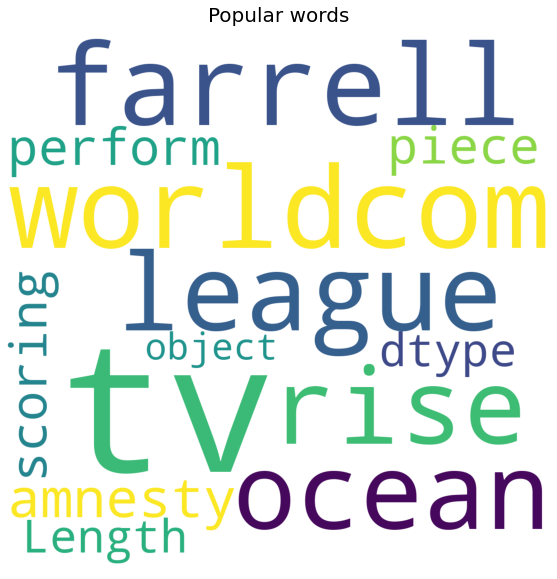

In [61]:
# Word Cloud
# pip install wordcloud

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 100).generate(str(full_list))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular words',fontsize = 20)
plt.show()

In [62]:
full_list.value_counts().head(20)

film        122
bn          111
labour       89
election     82
blair        76
music        69
party        63
brown        60
england      59
economy      55
mobile       53
tax          53
sales        52
growth       50
tv           50
wales        48
games        46
shares       45
bank         44
club         44
dtype: int64

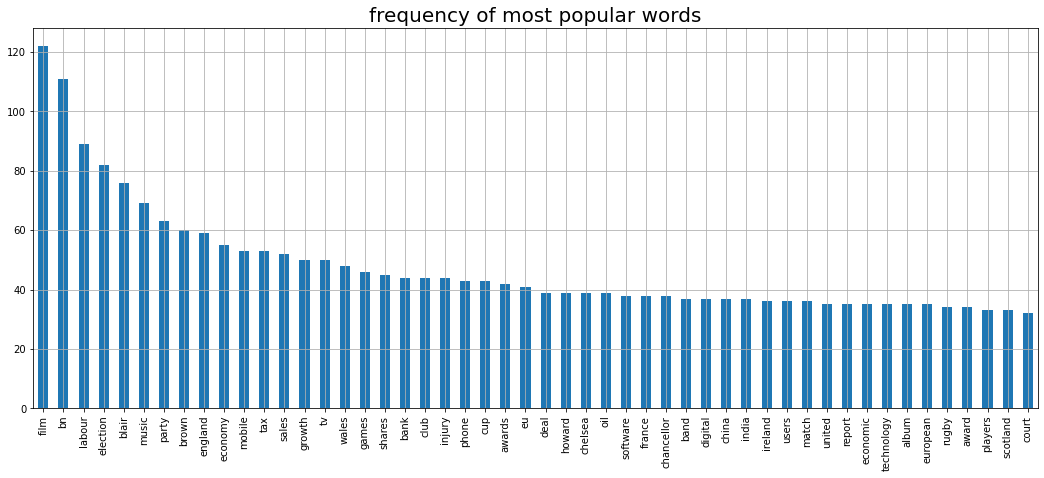

In [63]:
# looking at the frequency of most popular items 
plt.figure(figsize=(18,7))
full_list.value_counts().head(50).plot.bar()
#just plot out the top 50 items
plt.title('frequency of most popular words', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [64]:
y = full_list.value_counts().head(50).to_frame()
y.index

Index(['film', 'bn', 'labour', 'election', 'blair', 'music', 'party', 'brown',
       'england', 'economy', 'mobile', 'tax', 'sales', 'growth', 'tv', 'wales',
       'games', 'shares', 'bank', 'club', 'injury', 'phone', 'cup', 'awards',
       'eu', 'deal', 'howard', 'chelsea', 'oil', 'software', 'france',
       'chancellor', 'band', 'digital', 'china', 'india', 'ireland', 'users',
       'match', 'united', 'report', 'economic', 'technology', 'album',
       'european', 'rugby', 'award', 'players', 'scotland', 'court'],
      dtype='object')

In [65]:
topkey_df.values

array([['tv', 'definition', 'watch', ..., 'programmes', 'viewers',
        'means'],
       ['worldcom', 'ebbers', 'accounting', ..., 'collapsed', 'boss',
        'replied'],
       ['farrell', 'leicester', 'tigers', ..., 'andy', 'involved',
        'saracens'],
       ...,
       ['glasgow', 'concert', 'gig', ..., 'bought', 'fans', 'perform'],
       ['prisoners', 'arms', 'argument', ..., 'll', 'tells', 'piece'],
       ['souness', 'goal', 'uefa', ..., 'retire', 'nervous', 'scoring']],
      dtype=object)

In [66]:
#Transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array

te = TransactionEncoder()
data_encoded = te.fit_transform(topkeys)
data_encoded = pd.DataFrame(data_encoded, columns = te.columns_)

# getting the shape of the data
data_encoded.shape

(2225, 4260)

In [67]:
data_encoded

,aaas,abandoned,abc,able,abn,abortion,absolute,abuse,abused,ac,...,youth,yuan,yugansk,yuganskneftegas,yukos,yushchenko,zealand,zero,zone,zurich
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2221,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2222,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2223,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
data_encoded = data_encoded.loc[:, y.index]
#y.index = the top 50 items

data_encoded.shape

(2225, 50)

In [69]:
data_encoded.head()

,film,bn,labour,election,blair,music,party,brown,england,economy,...,report,economic,technology,album,european,rugby,award,players,scotland,court
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
help(apriori)

Help on function apriori in module mlxtend.frequent_patterns.apriori:

apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)
    Get frequent itemsets from a one-hot DataFrame
    
    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame the encoded format. Also supports
      DataFrames with sparse data; for more info, please
      see (https://pandas.pydata.org/pandas-docs/stable/
           user_guide/sparse.html#sparse-data-structures)
    
      Please note that the old pandas SparseDataFrame format
      is no longer supported in mlxtend >= 0.17.2.
    
      The allowed values are either 0/1 or True/False.
      For example,
    
    ```
             Apple  Bananas   Beer  Chicken   Milk   Rice
        0     True    False   True     True  False   True
        1     True    False   True    False  False   True
        2     True    False   True    False  False  False
        3     True     True  False    False  False  Fa

In [71]:
#First, let us return the items and itemsets with at least 1% support:
frequent_itemsets=apriori(data_encoded, min_support = 0.01, use_colnames = True)

In [72]:
frequent_itemsets

,support,itemsets
0,0.054831,(film)
1,0.049888,(bn)
2,0.040000,(labour)
3,0.036854,(election)
4,0.034157,(blair)
5,0.031011,(music)
6,0.028315,(party)
7,0.026966,(brown)
8,0.026517,(england)
9,0.024719,(economy)


In [73]:
frequent_itemsets[['support']].describe()
#base on 1%, have 59 items

,support
count,59.000000
mean,0.020232
std,0.008492
min,0.011236
25%,0.015730
50%,0.017528
75%,0.022022
max,0.054831


In [74]:
help(association_rules)

Help on function association_rules in module mlxtend.frequent_patterns.association_rules:

association_rules(df, metric='confidence', min_threshold=0.8, support_only=False)
    Generates a DataFrame of association rules including the
    metrics 'score', 'confidence', and 'lift'
    
    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame of frequent itemsets
      with columns ['support', 'itemsets']
    
    metric : string (default: 'confidence')
      Metric to evaluate if a rule is of interest.
      **Automatically set to 'support' if `support_only=True`.**
      Otherwise, supported metrics are 'support', 'confidence', 'lift',
      'leverage', and 'conviction'
      These metrics are computed as follows:
    
      - support(A->C) = support(A+C) [aka 'support'], range: [0, 1]
    
      - confidence(A->C) = support(A+C) / support(A), range: [0, 1]
    
      - lift(A->C) = confidence(A->C) / support(C), range: [0, inf]
    
      - leverage(A->C) = suppo

In [75]:
rules_c = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules_c

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(election),(labour),0.036854,0.040000,0.020674,0.560976,14.024390,0.019200,2.186667
1,(labour),(election),0.040000,0.036854,0.020674,0.516854,14.024390,0.019200,1.993488
2,(labour),(blair),0.040000,0.034157,0.014831,0.370787,10.855263,0.013465,1.535000
3,(blair),(labour),0.034157,0.040000,0.014831,0.434211,10.855263,0.013465,1.696744
4,(party),(labour),0.028315,0.040000,0.013034,0.460317,11.507937,0.011901,1.778824
5,(labour),(party),0.040000,0.028315,0.013034,0.325843,11.507937,0.011901,1.441333
6,(brown),(labour),0.026966,0.040000,0.013034,0.483333,12.083333,0.011955,1.858065
7,(labour),(brown),0.040000,0.026966,0.013034,0.325843,12.083333,0.011955,1.443333
8,(election),(blair),0.036854,0.034157,0.011236,0.304878,8.925706,0.009977,1.389458
9,(blair),(election),0.034157,0.036854,0.011236,0.328947,8.925706,0.009977,1.435276


In [76]:
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(chancellor),(brown),0.017079,0.026966,0.013933,0.815789,30.252193,0.013472,5.282183
0,(election),(labour),0.036854,0.040000,0.020674,0.560976,14.024390,0.019200,2.186667
17,(growth),(economy),0.022472,0.024719,0.011685,0.520000,21.036364,0.011130,2.031835
1,(labour),(election),0.040000,0.036854,0.020674,0.516854,14.024390,0.019200,1.993488
14,(brown),(chancellor),0.026966,0.017079,0.013933,0.516667,30.252193,0.013472,2.033630
6,(brown),(labour),0.026966,0.040000,0.013034,0.483333,12.083333,0.011955,1.858065
16,(economy),(growth),0.024719,0.022472,0.011685,0.472727,21.036364,0.011130,1.853933
4,(party),(labour),0.028315,0.040000,0.013034,0.460317,11.507937,0.011901,1.778824
3,(blair),(labour),0.034157,0.040000,0.014831,0.434211,10.855263,0.013465,1.696744
12,(brown),(election),0.026966,0.036854,0.011236,0.416667,11.305894,0.010242,1.651108


<AxesSubplot:>

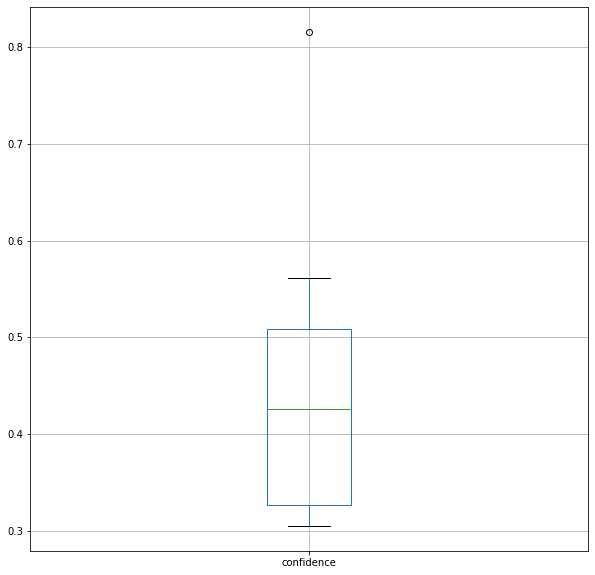

In [77]:
rules_c[['confidence']].boxplot()

In [78]:
rules_l = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_l

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(election),(labour),0.036854,0.040000,0.020674,0.560976,14.024390,0.019200,2.186667
1,(labour),(election),0.040000,0.036854,0.020674,0.516854,14.024390,0.019200,1.993488
2,(labour),(blair),0.040000,0.034157,0.014831,0.370787,10.855263,0.013465,1.535000
3,(blair),(labour),0.034157,0.040000,0.014831,0.434211,10.855263,0.013465,1.696744
4,(party),(labour),0.028315,0.040000,0.013034,0.460317,11.507937,0.011901,1.778824
5,(labour),(party),0.040000,0.028315,0.013034,0.325843,11.507937,0.011901,1.441333
6,(brown),(labour),0.026966,0.040000,0.013034,0.483333,12.083333,0.011955,1.858065
7,(labour),(brown),0.040000,0.026966,0.013034,0.325843,12.083333,0.011955,1.443333
8,(election),(blair),0.036854,0.034157,0.011236,0.304878,8.925706,0.009977,1.389458
9,(blair),(election),0.034157,0.036854,0.011236,0.328947,8.925706,0.009977,1.435276


In [79]:
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(brown),(chancellor),0.026966,0.017079,0.013933,0.516667,30.252193,0.013472,2.033630
15,(chancellor),(brown),0.017079,0.026966,0.013933,0.815789,30.252193,0.013472,5.282183
17,(growth),(economy),0.022472,0.024719,0.011685,0.520000,21.036364,0.011130,2.031835
16,(economy),(growth),0.024719,0.022472,0.011685,0.472727,21.036364,0.011130,1.853933
0,(election),(labour),0.036854,0.040000,0.020674,0.560976,14.024390,0.019200,2.186667
1,(labour),(election),0.040000,0.036854,0.020674,0.516854,14.024390,0.019200,1.993488
6,(brown),(labour),0.026966,0.040000,0.013034,0.483333,12.083333,0.011955,1.858065
7,(labour),(brown),0.040000,0.026966,0.013034,0.325843,12.083333,0.011955,1.443333
5,(labour),(party),0.040000,0.028315,0.013034,0.325843,11.507937,0.011901,1.441333
4,(party),(labour),0.028315,0.040000,0.013034,0.460317,11.507937,0.011901,1.778824


<AxesSubplot:>

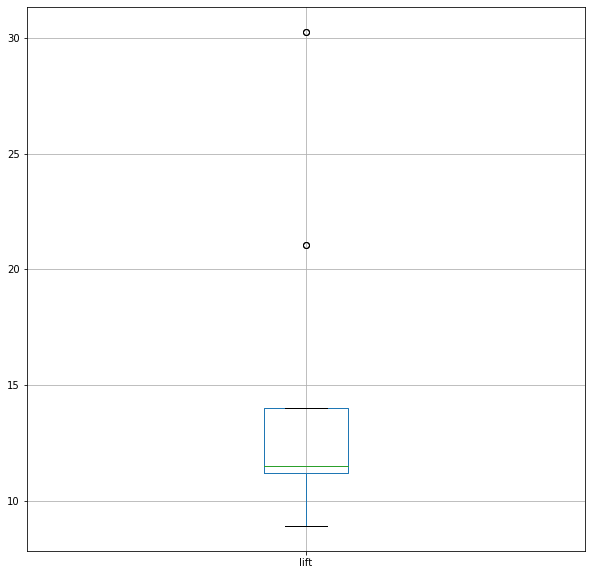

In [80]:
rules_l[['lift']].boxplot()

In [81]:
# Option A
rules_c[ (rules_c['lift'] >= 12) &
       (rules_c['confidence'] >= 0.52) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(chancellor),(brown),0.017079,0.026966,0.013933,0.815789,30.252193,0.013472,5.282183
0,(election),(labour),0.036854,0.040000,0.020674,0.560976,14.024390,0.019200,2.186667
17,(growth),(economy),0.022472,0.024719,0.011685,0.520000,21.036364,0.011130,2.031835


In [82]:
rules_l[ (rules_l['lift'] >= 12) &
       (rules_l['confidence'] >= 0.52) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(chancellor),(brown),0.017079,0.026966,0.013933,0.815789,30.252193,0.013472,5.282183
17,(growth),(economy),0.022472,0.024719,0.011685,0.520000,21.036364,0.011130,2.031835
0,(election),(labour),0.036854,0.040000,0.020674,0.560976,14.024390,0.019200,2.186667


#### Keyword for Sports

In [83]:
s_top_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,511,511,511,511,511,511,511,511,511,511
unique,270,294,316,347,368,380,367,367,379,393
top,wales,liverpool,chelsea,madrid,england,scotland,cup,injury,match,injury
freq,9,11,9,7,10,7,9,9,7,6


In [84]:
s_full_list=pd.Series([])
for col in s_top_df:
    s_full_list = s_full_list.append(s_top_df[col].dropna())

C:\Users\koayy\AppData\Local\Temp/ipykernel_3300/2188808590.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s_full_list=pd.Series([])


In [85]:
s_full_list

0        farrell
1         league
2         henman
3      wilkinson
4        roddick
         ...    
506      meeting
507          edu
508      minutes
509        stade
510      scoring
Length: 5110, dtype: object

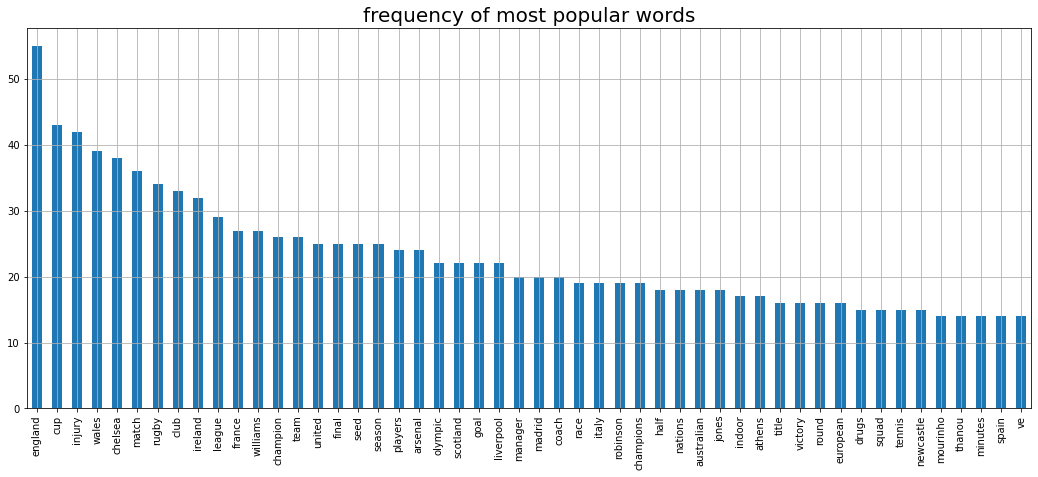

In [86]:
plt.figure(figsize=(18,7))
s_full_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular words', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [87]:
s_full_list.value_counts()

england         55
cup             43
injury          42
wales           39
chelsea         38
                ..
horse            1
requirements     1
withdrawal       1
hard             1
unbeaten         1
Length: 1473, dtype: int64

In [88]:
y1 = s_full_list.value_counts().head(50).to_frame()
y1.head()

,0
england,55
cup,43
injury,42
wales,39
chelsea,38


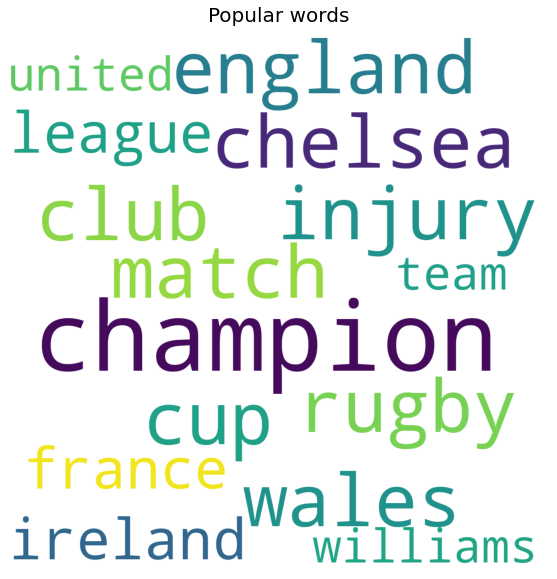

In [89]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 15).generate(str(y1))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular words',fontsize = 20)
plt.show()

In [90]:
te = TransactionEncoder()
data_encoded1 = te.fit_transform(s_keylist)
data_encoded1 = pd.DataFrame(data_encoded1, columns = te.columns_)

data_encoded1.shape

(511, 1473)

In [91]:
data_encoded1

,aaas,abandoned,able,ac,accident,achieved,action,actions,adapt,additional,...,yachvili,yard,yards,yelling,york,youngsters,youth,zealand,zero,zurich
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [92]:
data_encoded1 = data_encoded1.loc[:, y1.index]
#y.index = the top 50 items

data_encoded1.shape

(511, 50)

In [93]:
data_encoded1.head()

,england,cup,injury,wales,chelsea,match,rugby,club,ireland,league,...,european,drugs,squad,tennis,newcastle,mourinho,thanou,minutes,spain,ve
0,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [94]:
frequent_itemsets1=apriori(data_encoded1, min_support = 0.01, use_colnames = True)
frequent_itemsets1

,support,itemsets
0,0.107632,(england)
1,0.084149,(cup)
2,0.082192,(injury)
3,0.076321,(wales)
4,0.074364,(chelsea)
...,...,...
89,0.011742,"(seed, final)"
90,0.015656,"(scotland, italy)"
91,0.015656,"(thanou, athens)"
92,0.013699,"(wales, ireland, france)"


In [95]:
frequent_itemsets1[['support']].describe()
#base on 1%, have 94 items

,support
count,94.000000
mean,0.031394
std,0.019899
min,0.011742
25%,0.014188
50%,0.027397
75%,0.042074
max,0.107632


In [96]:
rules_c1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.3)
rules_c1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ireland),(england),0.062622,0.107632,0.021526,0.343750,3.193750,0.014786,1.359799
1,(france),(england),0.052838,0.107632,0.017613,0.333333,3.096970,0.011926,1.338552
2,(coach),(england),0.039139,0.107632,0.011742,0.300000,2.787273,0.007529,1.274811
3,(robinson),(england),0.037182,0.107632,0.027397,0.736842,6.845933,0.023395,3.390998
4,(nations),(england),0.035225,0.107632,0.013699,0.388889,3.613131,0.009907,1.460238
5,(spain),(cup),0.027397,0.084149,0.013699,0.500000,5.941860,0.011393,1.831703
6,(australian),(injury),0.035225,0.082192,0.011742,0.333333,4.055556,0.008846,1.376712
7,(ireland),(wales),0.062622,0.076321,0.019569,0.312500,4.094551,0.014790,1.343533
8,(wales),(france),0.076321,0.052838,0.025440,0.333333,6.308642,0.021408,1.420744
9,(france),(wales),0.052838,0.076321,0.025440,0.481481,6.308642,0.021408,1.781381


In [97]:
rules_c1.sort_values('confidence', ascending = False, inplace = True)
rules_c1.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(mourinho),(chelsea),0.027397,0.074364,0.023483,0.857143,11.526316,0.021446,6.479452
33,"(ireland, france)",(wales),0.017613,0.076321,0.013699,0.777778,10.190883,0.012354,4.156556
36,"(league, chelsea)",(champions),0.015656,0.037182,0.011742,0.750000,20.171053,0.011160,3.851272
35,"(champions, chelsea)",(league),0.015656,0.056751,0.011742,0.750000,13.215517,0.010853,3.772994
23,(champions),(league),0.037182,0.056751,0.027397,0.736842,12.983666,0.025287,3.584344
3,(robinson),(england),0.037182,0.107632,0.027397,0.736842,6.845933,0.023395,3.390998
31,"(wales, ireland)",(france),0.019569,0.052838,0.013699,0.700000,13.248148,0.012665,3.157208
29,(thanou),(athens),0.027397,0.033268,0.015656,0.571429,17.176471,0.014744,2.255708
32,"(wales, france)",(ireland),0.025440,0.062622,0.013699,0.538462,8.598558,0.012105,2.030985
5,(spain),(cup),0.027397,0.084149,0.013699,0.500000,5.941860,0.011393,1.831703


<AxesSubplot:>

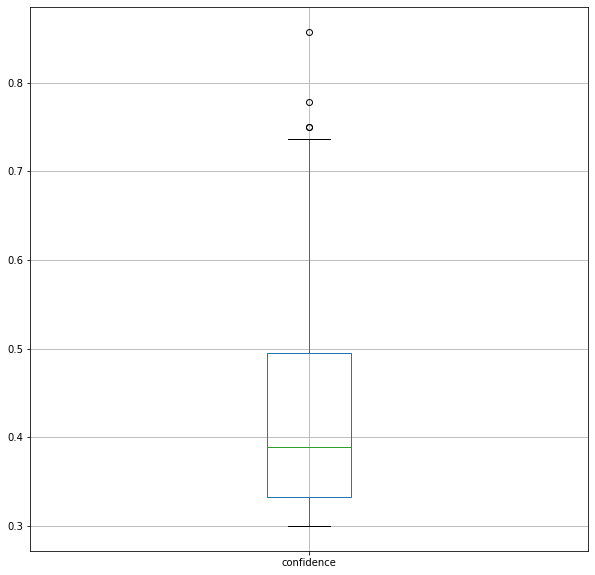

In [98]:
rules_c1[['confidence']].boxplot()

In [99]:
rules_l1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules_l1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(england),(cup),0.107632,0.084149,0.013699,0.127273,1.512474,0.004642,1.049413
1,(cup),(england),0.084149,0.107632,0.013699,0.162791,1.512474,0.004642,1.065884
2,(england),(injury),0.107632,0.082192,0.013699,0.127273,1.548485,0.004852,1.051655
3,(injury),(england),0.082192,0.107632,0.013699,0.166667,1.548485,0.004852,1.070841
4,(wales),(england),0.076321,0.107632,0.021526,0.282051,2.620513,0.013312,1.242941
...,...,...,...,...,...,...,...,...,...
91,"(champions, chelsea)",(league),0.015656,0.056751,0.011742,0.750000,13.215517,0.010853,3.772994
92,"(league, chelsea)",(champions),0.015656,0.037182,0.011742,0.750000,20.171053,0.011160,3.851272
93,(champions),"(league, chelsea)",0.037182,0.015656,0.011742,0.315789,20.171053,0.011160,1.438657
94,(league),"(champions, chelsea)",0.056751,0.015656,0.011742,0.206897,13.215517,0.010853,1.241130


In [100]:
rules_l1.sort_values('lift', ascending = False, inplace = True)
rules_l1.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
93,(champions),"(league, chelsea)",0.037182,0.015656,0.011742,0.315789,20.171053,0.011160,1.438657
92,"(league, chelsea)",(champions),0.015656,0.037182,0.011742,0.750000,20.171053,0.011160,3.851272
82,(thanou),(athens),0.027397,0.033268,0.015656,0.571429,17.176471,0.014744,2.255708
83,(athens),(thanou),0.033268,0.027397,0.015656,0.470588,17.176471,0.014744,1.837139
84,"(wales, ireland)",(france),0.019569,0.052838,0.013699,0.700000,13.248148,0.012665,3.157208
89,(france),"(wales, ireland)",0.052838,0.019569,0.013699,0.259259,13.248148,0.012665,1.323581
94,(league),"(champions, chelsea)",0.056751,0.015656,0.011742,0.206897,13.215517,0.010853,1.241130
91,"(champions, chelsea)",(league),0.015656,0.056751,0.011742,0.750000,13.215517,0.010853,3.772994
73,(league),(champions),0.056751,0.037182,0.027397,0.482759,12.983666,0.025287,1.861448
72,(champions),(league),0.037182,0.056751,0.027397,0.736842,12.983666,0.025287,3.584344


<AxesSubplot:>

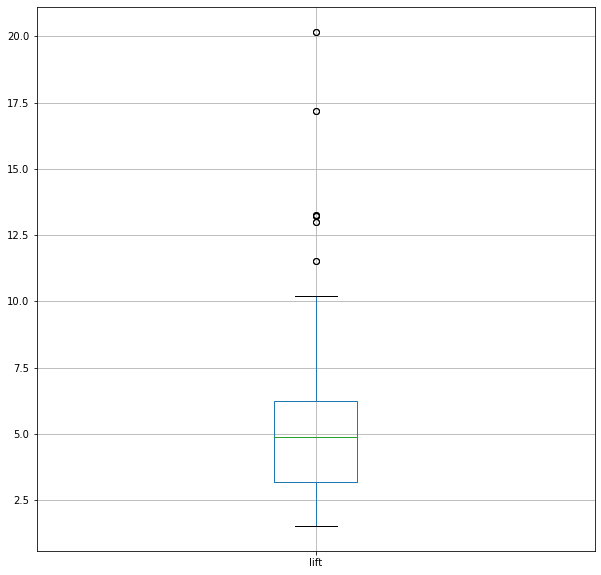

In [101]:
rules_l1[['lift']].boxplot()

In [102]:
# Option A
rules_c1[ (rules_c1['lift'] >= 12) &
       (rules_c1['confidence'] >= 0.52) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,"(league, chelsea)",(champions),0.015656,0.037182,0.011742,0.750000,20.171053,0.011160,3.851272
35,"(champions, chelsea)",(league),0.015656,0.056751,0.011742,0.750000,13.215517,0.010853,3.772994
23,(champions),(league),0.037182,0.056751,0.027397,0.736842,12.983666,0.025287,3.584344
31,"(wales, ireland)",(france),0.019569,0.052838,0.013699,0.700000,13.248148,0.012665,3.157208
29,(thanou),(athens),0.027397,0.033268,0.015656,0.571429,17.176471,0.014744,2.255708


In [103]:
rules_l1[ (rules_l1['lift'] >= 12) &
       (rules_l1['confidence'] >= 0.52) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
92,"(league, chelsea)",(champions),0.015656,0.037182,0.011742,0.750000,20.171053,0.011160,3.851272
82,(thanou),(athens),0.027397,0.033268,0.015656,0.571429,17.176471,0.014744,2.255708
84,"(wales, ireland)",(france),0.019569,0.052838,0.013699,0.700000,13.248148,0.012665,3.157208
91,"(champions, chelsea)",(league),0.015656,0.056751,0.011742,0.750000,13.215517,0.010853,3.772994
72,(champions),(league),0.037182,0.056751,0.027397,0.736842,12.983666,0.025287,3.584344


#### Keyword for Business

In [104]:
b_top_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,510,510,510,510,510,510,510,510,510,510
unique,278,325,333,357,347,379,385,374,384,400
top,yukos,bank,bn,bn,bn,bn,bn,growth,bn,bn
freq,13,13,16,9,17,12,7,9,14,7


In [105]:
b_full_list=pd.Series([])
for col in b_top_df:
    b_full_list = b_full_list.append(b_top_df[col].dropna())

C:\Users\koayy\AppData\Local\Temp/ipykernel_3300/2834652291.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  b_full_list=pd.Series([])


In [106]:
b_full_list

0        worldcom
1          virgin
2          prices
3              lg
4      mitsubishi
          ...    
505        forced
506       festive
507    presidency
508          team
509          rise
Length: 5100, dtype: object

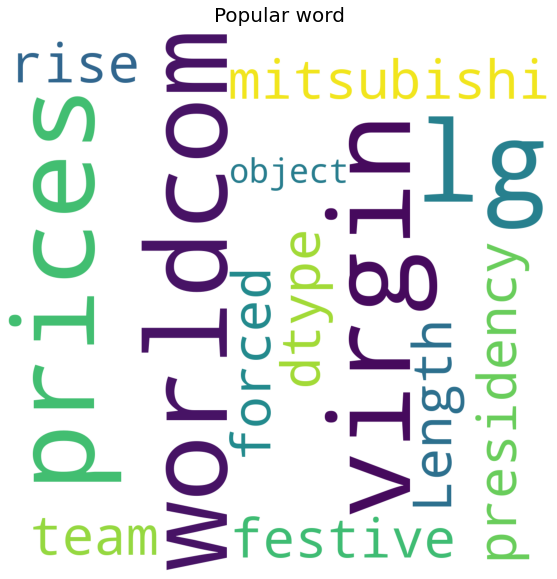

In [107]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 100).generate(str(b_full_list))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular word',fontsize = 20)
plt.show()

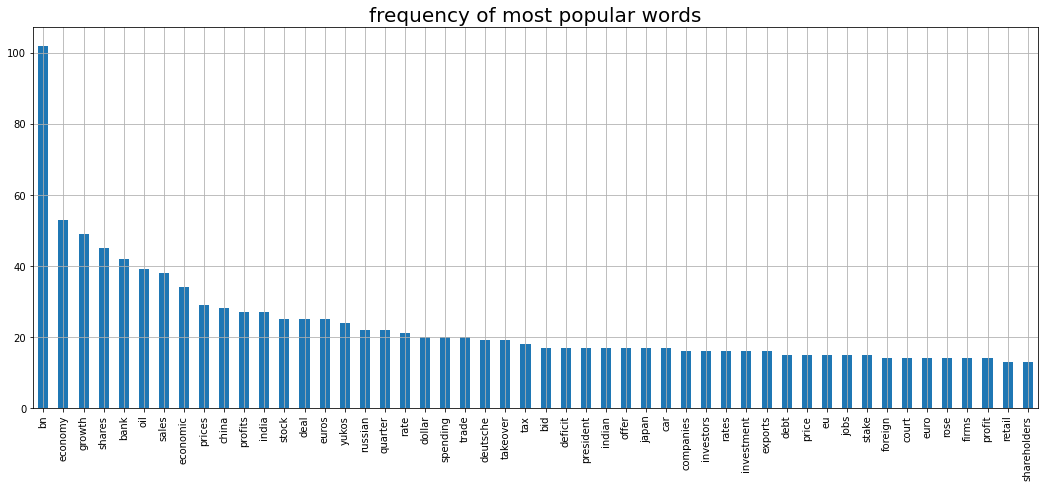

In [108]:
plt.figure(figsize=(18,7))
b_full_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular words', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [109]:
b_full_list.value_counts()

bn           102
economy       53
growth        49
shares        45
bank          42
            ... 
girls          1
efforts        1
expensive      1
enable         1
team           1
Length: 1632, dtype: int64

In [110]:
y2 = b_full_list.value_counts().head(50).to_frame()
y2.index

Index(['bn', 'economy', 'growth', 'shares', 'bank', 'oil', 'sales', 'economic',
       'prices', 'china', 'profits', 'india', 'stock', 'deal', 'euros',
       'yukos', 'russian', 'quarter', 'rate', 'dollar', 'spending', 'trade',
       'deutsche', 'takeover', 'tax', 'bid', 'deficit', 'president', 'indian',
       'offer', 'japan', 'car', 'companies', 'investors', 'rates',
       'investment', 'exports', 'debt', 'price', 'eu', 'jobs', 'stake',
       'foreign', 'court', 'euro', 'rose', 'firms', 'profit', 'retail',
       'shareholders'],
      dtype='object')

In [111]:
#Transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array

te = TransactionEncoder()
data_encoded2 = te.fit_transform(b_keylist)
data_encoded2 = pd.DataFrame(data_encoded2, columns = te.columns_)

# getting the shape of the data
data_encoded2.shape

(510, 1632)

In [112]:
data_encoded2

,abn,accept,access,account,accounting,accounts,accused,achieving,acquisition,act,...,yen,york,yorkshire,youth,yuan,yugansk,yuganskneftegas,yukos,yushchenko,zone
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [113]:
data_encoded2 = data_encoded2.loc[:, y2.index]
#y.index = the top 50 items

data_encoded2.shape

(510, 50)

In [114]:
data_encoded2.head()

,bn,economy,growth,shares,bank,oil,sales,economic,prices,china,...,jobs,stake,foreign,court,euro,rose,firms,profit,retail,shareholders
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [115]:
frequent_itemsets2=apriori(data_encoded2, min_support = 0.01, use_colnames = True)
frequent_itemsets2

,support,itemsets
0,0.200000,(bn)
1,0.103922,(economy)
2,0.096078,(growth)
3,0.088235,(shares)
4,0.082353,(bank)
...,...,...
105,0.011765,"(economy, growth, economic)"
106,0.013725,"(economy, growth, quarter)"
107,0.011765,"(economy, growth, rate)"
108,0.017647,"(russian, oil, yukos)"


In [116]:
frequent_itemsets2[['support']].describe()
#base on 1%, have 110 items

,support
count,110.000000
mean,0.030357
std,0.024955
min,0.011765
25%,0.013725
50%,0.024510
75%,0.033333
max,0.200000


In [117]:
rules_c2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.3)
rules_c2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(profits),(bn),0.052941,0.200000,0.025490,0.481481,2.407407,0.014902,1.542857
1,(deal),(bn),0.049020,0.200000,0.017647,0.360000,1.800000,0.007843,1.250000
2,(euros),(bn),0.049020,0.200000,0.029412,0.600000,3.000000,0.019608,2.000000
3,(yukos),(bn),0.047059,0.200000,0.015686,0.333333,1.666667,0.006275,1.200000
4,(russian),(bn),0.043137,0.200000,0.013725,0.318182,1.590909,0.005098,1.173333
...,...,...,...,...,...,...,...,...,...
70,"(russian, yukos)",(court),0.037255,0.027451,0.013725,0.368421,13.421053,0.012703,1.539869
71,"(russian, court)",(yukos),0.013725,0.047059,0.013725,1.000000,21.250000,0.013080,inf
72,"(yukos, court)",(russian),0.013725,0.043137,0.013725,1.000000,23.181818,0.013133,inf
73,(russian),"(yukos, court)",0.043137,0.013725,0.013725,0.318182,23.181818,0.013133,1.446536


In [118]:
rules_c2.sort_values('confidence', ascending = False, inplace = True)
rules_c2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
54,"(russian, bn)",(yukos),0.013725,0.047059,0.013725,1.000000,21.250000,0.013080,inf
72,"(yukos, court)",(russian),0.013725,0.043137,0.013725,1.000000,23.181818,0.013133,inf
71,"(russian, court)",(yukos),0.013725,0.047059,0.013725,1.000000,21.250000,0.013080,inf
65,"(russian, oil)",(yukos),0.019608,0.047059,0.017647,0.900000,19.125000,0.016724,9.529412
56,"(yukos, bn)",(russian),0.015686,0.043137,0.013725,0.875000,20.284091,0.013049,7.654902
40,(russian),(yukos),0.043137,0.047059,0.037255,0.863636,18.352273,0.035225,6.988235
41,(yukos),(russian),0.047059,0.043137,0.037255,0.791667,18.352273,0.035225,4.592941
67,"(yukos, oil)",(russian),0.023529,0.043137,0.017647,0.750000,17.386364,0.016632,3.827451
39,(indian),(india),0.033333,0.052941,0.023529,0.705882,13.333333,0.021765,3.220000
61,"(growth, quarter)",(economy),0.019608,0.103922,0.013725,0.700000,6.735849,0.011688,2.986928


<AxesSubplot:>

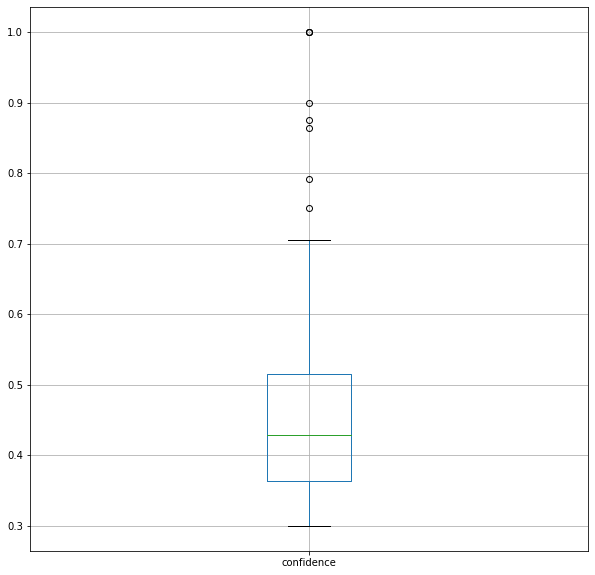

In [119]:
rules_c2[['confidence']].boxplot()

In [120]:
rules_l2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules_l2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bn),(shares),0.200000,0.088235,0.023529,0.117647,1.333333,0.005882,1.033333
1,(shares),(bn),0.088235,0.200000,0.023529,0.266667,1.333333,0.005882,1.090909
2,(bn),(oil),0.200000,0.076471,0.019608,0.098039,1.282051,0.004314,1.023913
3,(oil),(bn),0.076471,0.200000,0.019608,0.256410,1.282051,0.004314,1.075862
4,(bn),(sales),0.200000,0.074510,0.021569,0.107843,1.447368,0.006667,1.037363
...,...,...,...,...,...,...,...,...,...
135,"(russian, court)",(yukos),0.013725,0.047059,0.013725,1.000000,21.250000,0.013080,inf
136,"(yukos, court)",(russian),0.013725,0.043137,0.013725,1.000000,23.181818,0.013133,inf
137,(russian),"(yukos, court)",0.043137,0.013725,0.013725,0.318182,23.181818,0.013133,1.446536
138,(yukos),"(russian, court)",0.047059,0.013725,0.013725,0.291667,21.250000,0.013080,1.392388


In [121]:
rules_l2.sort_values('lift', ascending = False, inplace = True)
rules_l2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
137,(russian),"(yukos, court)",0.043137,0.013725,0.013725,0.318182,23.181818,0.013133,1.446536
136,"(yukos, court)",(russian),0.013725,0.043137,0.013725,1.000000,23.181818,0.013133,inf
138,(yukos),"(russian, court)",0.047059,0.013725,0.013725,0.291667,21.250000,0.013080,1.392388
135,"(russian, court)",(yukos),0.013725,0.047059,0.013725,1.000000,21.250000,0.013080,inf
109,(yukos),"(russian, bn)",0.047059,0.013725,0.013725,0.291667,21.250000,0.013080,1.392388
104,"(russian, bn)",(yukos),0.013725,0.047059,0.013725,1.000000,21.250000,0.013080,inf
107,(russian),"(yukos, bn)",0.043137,0.015686,0.013725,0.318182,20.284091,0.013049,1.443660
106,"(yukos, bn)",(russian),0.015686,0.043137,0.013725,0.875000,20.284091,0.013049,7.654902
128,"(russian, oil)",(yukos),0.019608,0.047059,0.017647,0.900000,19.125000,0.016724,9.529412
133,(yukos),"(russian, oil)",0.047059,0.019608,0.017647,0.375000,19.125000,0.016724,1.568627


<AxesSubplot:>

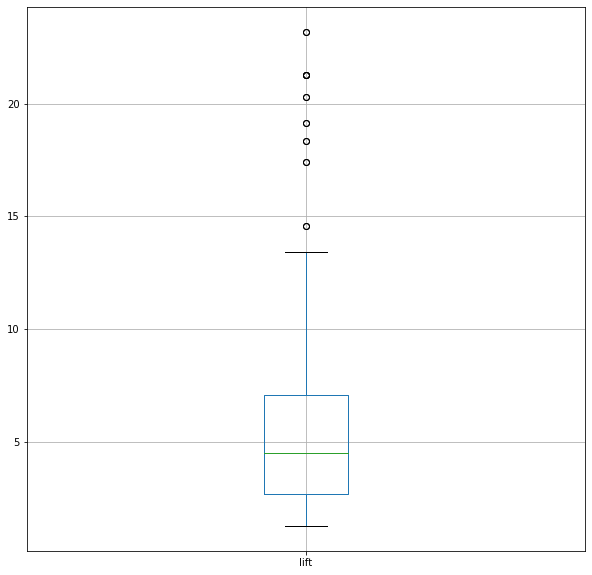

In [122]:
rules_l2[['lift']].boxplot()

In [123]:
# Option A
rules_c2[ (rules_c2['lift'] >= 20) &
       (rules_c2['confidence'] >= 0.70) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
54,"(russian, bn)",(yukos),0.013725,0.047059,0.013725,1.000,21.250000,0.013080,inf
72,"(yukos, court)",(russian),0.013725,0.043137,0.013725,1.000,23.181818,0.013133,inf
71,"(russian, court)",(yukos),0.013725,0.047059,0.013725,1.000,21.250000,0.013080,inf
56,"(yukos, bn)",(russian),0.015686,0.043137,0.013725,0.875,20.284091,0.013049,7.654902


In [124]:
rules_l2[ (rules_l2['lift'] >= 20) &
       (rules_l2['confidence'] >= 0.70) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
136,"(yukos, court)",(russian),0.013725,0.043137,0.013725,1.000,23.181818,0.013133,inf
135,"(russian, court)",(yukos),0.013725,0.047059,0.013725,1.000,21.250000,0.013080,inf
104,"(russian, bn)",(yukos),0.013725,0.047059,0.013725,1.000,21.250000,0.013080,inf
106,"(yukos, bn)",(russian),0.015686,0.043137,0.013725,0.875,20.284091,0.013049,7.654902


#### Keyword for Politics

In [125]:
p_top_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,417,417,417,417,417,417,417,417,417,417
unique,222,239,267,280,302,302,305,310,312,330
top,brown,labour,labour,election,election,labour,party,party,election,leader
freq,16,20,18,10,8,12,10,8,6,5


In [126]:
p_full_list=pd.Series([])
for col in p_top_df:
    p_full_list = p_full_list.append(p_top_df[col].dropna())

C:\Users\koayy\AppData\Local\Temp/ipykernel_3300/3716922987.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  p_full_list=pd.Series([])


In [127]:
p_full_list

0          howard
1      parliament
2           hague
3            stem
4          clarke
          ...    
412          seen
413         prime
414       british
415       amnesty
416         piece
Length: 4170, dtype: object

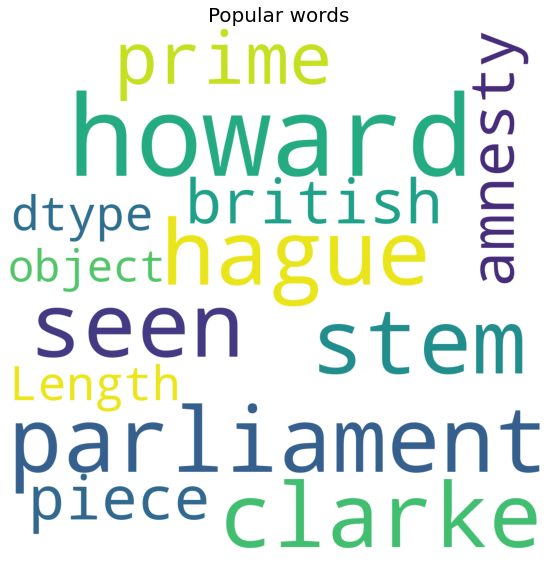

In [128]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 100).generate(str(p_full_list))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular words',fontsize = 20)
plt.show()

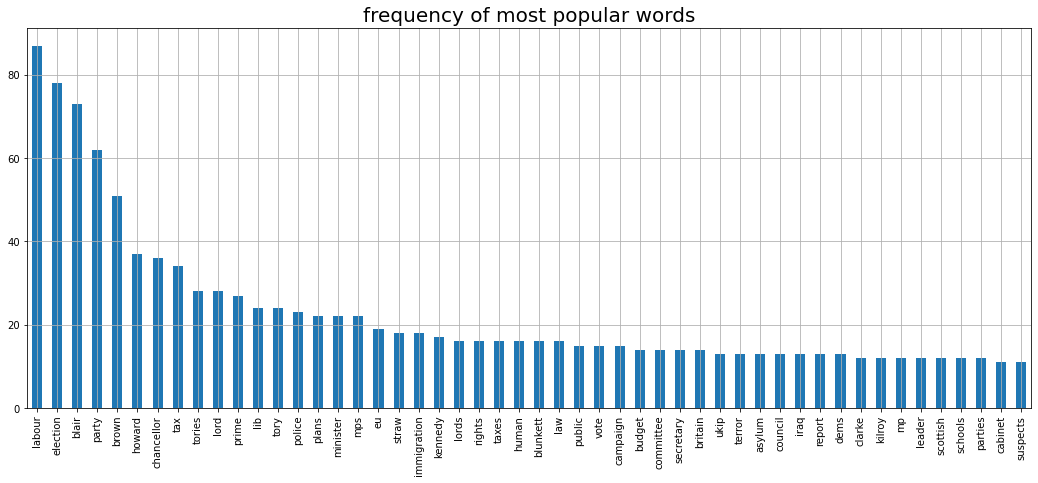

In [129]:
plt.figure(figsize=(18,7))
p_full_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular words', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [130]:
p_full_list.value_counts()

labour            87
election          78
blair             73
party             62
brown             51
                  ..
representation     1
genuine            1
surely             1
fired              1
piece              1
Length: 1444, dtype: int64

In [131]:
y3 = p_full_list.value_counts().head(50).to_frame()
y3.index

Index(['labour', 'election', 'blair', 'party', 'brown', 'howard', 'chancellor',
       'tax', 'tories', 'lord', 'prime', 'lib', 'tory', 'police', 'plans',
       'minister', 'mps', 'eu', 'straw', 'immigration', 'kennedy', 'lords',
       'rights', 'taxes', 'human', 'blunkett', 'law', 'public', 'vote',
       'campaign', 'budget', 'committee', 'secretary', 'britain', 'ukip',
       'terror', 'asylum', 'council', 'iraq', 'report', 'dems', 'clarke',
       'kilroy', 'mp', 'leader', 'scottish', 'schools', 'parties', 'cabinet',
       'suspects'],
      dtype='object')

In [132]:
#Transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array

te = TransactionEncoder()
data_encoded3 = te.fit_transform(p_keylist)
data_encoded3 = pd.DataFrame(data_encoded3, columns = te.columns_)

# getting the shape of the data
data_encoded3.shape

(417, 1444)

In [133]:
data_encoded3

,able,abortion,abuse,abused,accept,accepted,access,accident,accounts,accurate,...,word,worker,workers,worried,worth,writers,writing,wrong,yes,yorkshire
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
413,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [134]:
data_encoded3 = data_encoded3.loc[:, y3.index]
#y.index = the top 50 items

data_encoded3.shape

(417, 50)

In [135]:
data_encoded3.head()

,labour,election,blair,party,brown,howard,chancellor,tax,tories,lord,...,dems,clarke,kilroy,mp,leader,scottish,schools,parties,cabinet,suspects
0,True,True,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [136]:
frequent_itemsets3=apriori(data_encoded3, min_support = 0.01, use_colnames = True)
frequent_itemsets3

,support,itemsets
0,0.208633,(labour)
1,0.187050,(election)
2,0.175060,(blair)
3,0.148681,(party)
4,0.122302,(brown)
...,...,...
282,0.014388,"(minister, brown, labour, blair, prime)"
283,0.011990,"(minister, chancellor, labour, blair, prime)"
284,0.014388,"(minister, chancellor, brown, labour, prime)"
285,0.014388,"(minister, chancellor, brown, blair, prime)"


In [137]:
frequent_itemsets3[['support']].describe()
#base on 1%, have 287 items

,support
count,287.000000
mean,0.026738
std,0.024686
min,0.011990
25%,0.014388
50%,0.019185
75%,0.029976
max,0.208633


In [138]:
rules_c3 = association_rules(frequent_itemsets3, metric="confidence", min_threshold=0.3)
rules_c3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(election),(labour),0.187050,0.208633,0.107914,0.576923,2.765252,0.068889,1.870504
1,(labour),(election),0.208633,0.187050,0.107914,0.517241,2.765252,0.068889,1.683967
2,(labour),(blair),0.208633,0.175060,0.079137,0.379310,2.166745,0.042613,1.329070
3,(blair),(labour),0.175060,0.208633,0.079137,0.452055,2.166745,0.042613,1.444245
4,(party),(labour),0.148681,0.208633,0.069544,0.467742,2.241935,0.038525,1.486811
...,...,...,...,...,...,...,...,...,...
850,"(prime, minister)","(brown, labour, blair, chancellor)",0.038369,0.019185,0.011990,0.312500,16.289062,0.011254,1.426641
851,"(blair, chancellor)","(brown, minister, labour, prime)",0.028777,0.019185,0.011990,0.416667,21.718750,0.011438,1.681398
852,"(prime, chancellor)","(brown, minister, labour, blair)",0.016787,0.014388,0.011990,0.714286,49.642857,0.011749,3.449640
853,"(brown, prime)","(minister, labour, blair, chancellor)",0.033573,0.011990,0.011990,0.357143,29.785714,0.011588,1.536904


In [139]:
rules_c3 = association_rules(frequent_itemsets3, metric="confidence", min_threshold=0.3)
rules_c3.sort_values('confidence', ascending = False, inplace = True)
rules_c3.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
806,"(minister, chancellor, brown, labour, blair)",(prime),0.011990,0.064748,0.011990,1.0,15.444444,0.011214,inf
546,"(brown, minister, labour)",(prime),0.019185,0.064748,0.019185,1.0,15.444444,0.017942,inf
620,"(brown, minister, blair)",(prime),0.023981,0.064748,0.023981,1.0,15.444444,0.022428,inf
540,"(minister, labour, chancellor)",(brown),0.014388,0.122302,0.014388,1.0,8.176471,0.012629,inf
613,"(minister, blair, chancellor)",(brown),0.014388,0.122302,0.014388,1.0,8.176471,0.012629,inf
280,"(election, minister)",(prime),0.011990,0.064748,0.011990,1.0,15.444444,0.011214,inf
684,"(prime, labour, blair, chancellor)",(brown),0.011990,0.122302,0.011990,1.0,8.176471,0.010524,inf
606,"(prime, blair, chancellor)",(brown),0.014388,0.122302,0.014388,1.0,8.176471,0.012629,inf
292,"(blair, chancellor)",(brown),0.028777,0.122302,0.028777,1.0,8.176471,0.025257,inf
81,(dems),(lib),0.031175,0.057554,0.031175,1.0,17.375000,0.029381,inf


<AxesSubplot:>

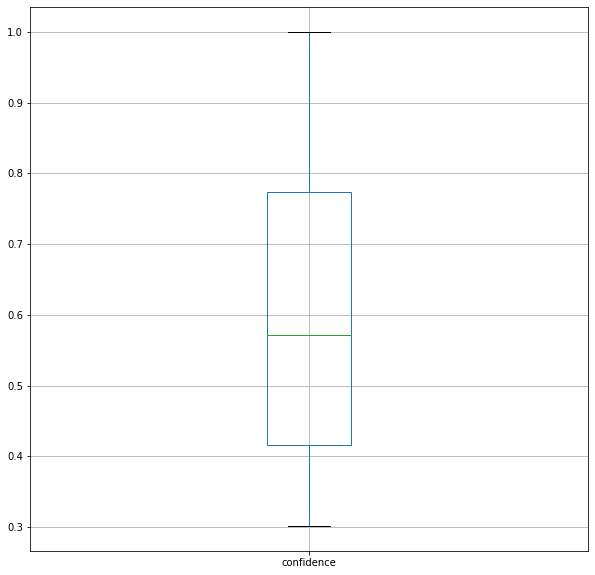

In [140]:
rules_c3[['confidence']].boxplot()

In [141]:
rules_l3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1)
rules_l3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(election),(labour),0.187050,0.208633,0.107914,0.576923,2.765252,0.068889,1.870504
1,(labour),(election),0.208633,0.187050,0.107914,0.517241,2.765252,0.068889,1.683967
2,(labour),(blair),0.208633,0.175060,0.079137,0.379310,2.166745,0.042613,1.329070
3,(blair),(labour),0.175060,0.208633,0.079137,0.452055,2.166745,0.042613,1.444245
4,(party),(labour),0.148681,0.208633,0.069544,0.467742,2.241935,0.038525,1.486811
...,...,...,...,...,...,...,...,...,...
1475,(chancellor),"(minister, brown, labour, blair, prime)",0.086331,0.014388,0.011990,0.138889,9.652778,0.010748,1.144581
1476,(brown),"(minister, chancellor, labour, blair, prime)",0.122302,0.011990,0.011990,0.098039,8.176471,0.010524,1.095402
1477,(labour),"(minister, chancellor, brown, blair, prime)",0.208633,0.014388,0.011990,0.057471,3.994253,0.008988,1.045710
1478,(blair),"(minister, chancellor, brown, labour, prime)",0.175060,0.014388,0.011990,0.068493,4.760274,0.009472,1.058083


In [142]:
rules_l3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1)
rules_l3.sort_values('lift', ascending = False, inplace = True)
rules_l3.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1430,"(brown, minister, labour, blair)","(prime, chancellor)",0.014388,0.016787,0.011990,0.833333,49.642857,0.011749,5.899281
1467,"(prime, chancellor)","(brown, minister, labour, blair)",0.016787,0.014388,0.011990,0.714286,49.642857,0.011749,3.449640
1366,"(brown, minister, labour)","(prime, chancellor)",0.019185,0.016787,0.014388,0.750000,44.678571,0.014066,3.932854
1379,"(prime, chancellor)","(brown, minister, labour)",0.016787,0.019185,0.014388,0.857143,44.678571,0.014066,6.865707
1230,"(lib, labour)","(party, election, kennedy)",0.019185,0.014388,0.011990,0.625000,43.437500,0.011714,2.628297
1454,"(prime, blair, chancellor)","(brown, minister, labour)",0.014388,0.019185,0.011990,0.833333,43.437500,0.011714,5.884892
1443,"(brown, minister, labour)","(prime, blair, chancellor)",0.019185,0.014388,0.011990,0.625000,43.437500,0.011714,2.628297
1215,"(party, election, kennedy)","(lib, labour)",0.014388,0.019185,0.011990,0.833333,43.437500,0.011714,5.884892
1229,"(election, kennedy)","(lib, party, labour)",0.021583,0.014388,0.011990,0.555556,38.611111,0.011680,2.217626
1216,"(lib, party, labour)","(election, kennedy)",0.014388,0.021583,0.011990,0.833333,38.611111,0.011680,5.870504


<AxesSubplot:>

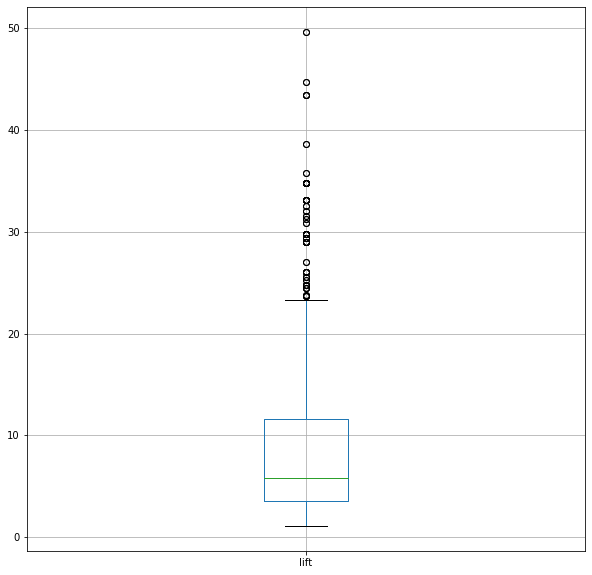

In [143]:
rules_l3[['lift']].boxplot()

In [144]:
# Option A
rules_c3[ (rules_c3['lift'] >= 40) &
       (rules_c3['confidence'] >= 0.70) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
781,"(prime, chancellor)","(brown, minister, labour)",0.016787,0.019185,0.014388,0.857143,44.678571,0.014066,6.865707
818,"(brown, minister, labour, blair)","(prime, chancellor)",0.014388,0.016787,0.011990,0.833333,49.642857,0.011749,5.899281
841,"(prime, blair, chancellor)","(brown, minister, labour)",0.014388,0.019185,0.011990,0.833333,43.437500,0.011714,5.884892
667,"(party, election, kennedy)","(lib, labour)",0.014388,0.019185,0.011990,0.833333,43.437500,0.011714,5.884892
769,"(brown, minister, labour)","(prime, chancellor)",0.019185,0.016787,0.014388,0.750000,44.678571,0.014066,3.932854
852,"(prime, chancellor)","(brown, minister, labour, blair)",0.016787,0.014388,0.011990,0.714286,49.642857,0.011749,3.449640


In [145]:
rules_l3[ (rules_l3['lift'] >= 40) &
       (rules_l3['confidence'] >= 0.70) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1430,"(brown, minister, labour, blair)","(prime, chancellor)",0.014388,0.016787,0.011990,0.833333,49.642857,0.011749,5.899281
1467,"(prime, chancellor)","(brown, minister, labour, blair)",0.016787,0.014388,0.011990,0.714286,49.642857,0.011749,3.449640
1366,"(brown, minister, labour)","(prime, chancellor)",0.019185,0.016787,0.014388,0.750000,44.678571,0.014066,3.932854
1379,"(prime, chancellor)","(brown, minister, labour)",0.016787,0.019185,0.014388,0.857143,44.678571,0.014066,6.865707
1454,"(prime, blair, chancellor)","(brown, minister, labour)",0.014388,0.019185,0.011990,0.833333,43.437500,0.011714,5.884892
1215,"(party, election, kennedy)","(lib, labour)",0.014388,0.019185,0.011990,0.833333,43.437500,0.011714,5.884892


#### Keyword for Tech

In [146]:
t_top_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,401,401,401,401,401,401,401,401,401,401
unique,214,223,237,236,251,263,267,265,280,281
top,music,mobile,software,software,users,web,viruses,users,information,sites
freq,11,14,10,12,9,7,5,10,8,5


In [147]:
t_full_list=pd.Series([])
for col in t_top_df:
    t_full_list = t_full_list.append(t_top_df[col].dropna())

C:\Users\koayy\AppData\Local\Temp/ipykernel_3300/2809493631.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  t_full_list=pd.Series([])


In [148]:
t_full_list

0             tv
1       argonaut
2            fbi
3      bandwidth
4          sound
         ...    
396        fired
397      protect
398      offices
399     analysis
400        virus
Length: 4010, dtype: object

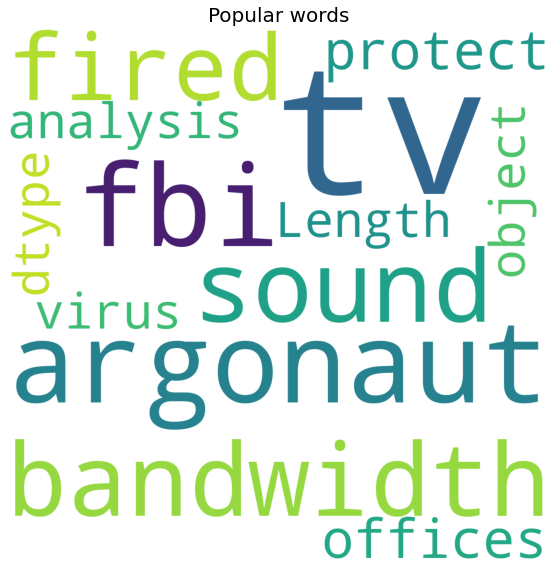

In [149]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 100).generate(str(t_full_list))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular words',fontsize = 20)
plt.show()

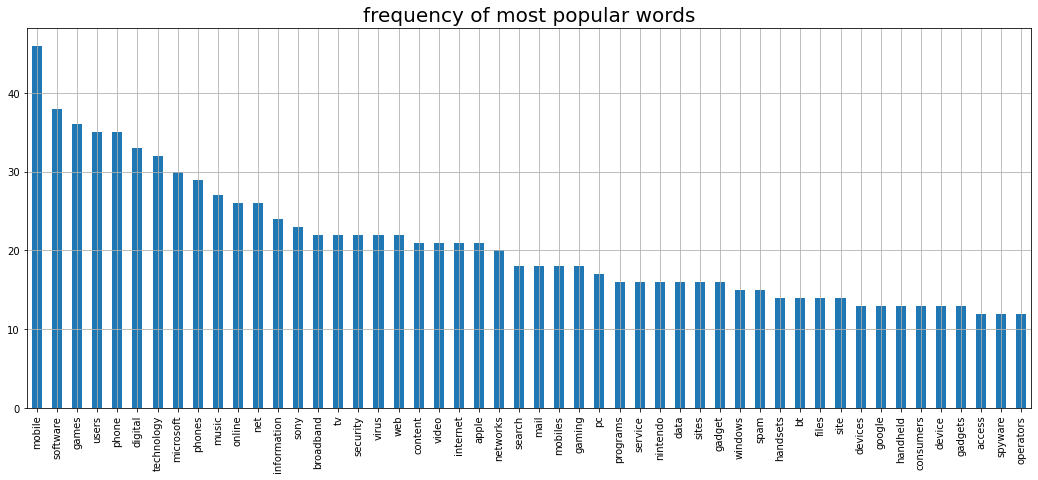

In [150]:
plt.figure(figsize=(18,7))
t_full_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular words', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [151]:
t_full_list.value_counts()

mobile      46
software    38
games       36
users       35
phone       35
            ..
traders      1
schools      1
story        1
earth        1
operator     1
Length: 1307, dtype: int64

In [152]:
y4 = t_full_list.value_counts().head(50).to_frame()
y4.index

Index(['mobile', 'software', 'games', 'users', 'phone', 'digital',
       'technology', 'microsoft', 'phones', 'music', 'online', 'net',
       'information', 'sony', 'broadband', 'tv', 'security', 'virus', 'web',
       'content', 'video', 'internet', 'apple', 'networks', 'search', 'mail',
       'mobiles', 'gaming', 'pc', 'programs', 'service', 'nintendo', 'data',
       'sites', 'gadget', 'windows', 'spam', 'handsets', 'bt', 'files', 'site',
       'devices', 'google', 'handheld', 'consumers', 'device', 'gadgets',
       'access', 'spyware', 'operators'],
      dtype='object')

In [153]:
#Transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array

te = TransactionEncoder()
data_encoded4 = te.fit_transform(t_keylist)
data_encoded4 = pd.DataFrame(data_encoded4, columns = te.columns_)

# getting the shape of the data
data_encoded4.shape

(401, 1307)

In [154]:
data_encoded4

,able,access,according,account,accounts,accurate,acquisition,act,action,active,...,wouldn,wright,writers,written,wrong,wrote,xbox,xp,yahoo,york
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
399,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [155]:
data_encoded4 = data_encoded4.loc[:, y4.index]
#y.index = the top 50 items

data_encoded4.shape

(401, 50)

In [156]:
data_encoded4.head()

,mobile,software,games,users,phone,digital,technology,microsoft,phones,music,...,site,devices,google,handheld,consumers,device,gadgets,access,spyware,operators
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [157]:
frequent_itemsets4=apriori(data_encoded4, min_support = 0.01, use_colnames = True)
frequent_itemsets4

,support,itemsets
0,0.114713,(mobile)
1,0.094763,(software)
2,0.089776,(games)
3,0.087282,(users)
4,0.087282,(phone)
...,...,...
145,0.012469,"(microsoft, security, windows)"
146,0.012469,"(nintendo, gaming, sony)"
147,0.017456,"(nintendo, handheld, sony)"
148,0.014963,"(nintendo, handheld, gaming)"


In [158]:
frequent_itemsets4[['support']].describe()
#base on 1%, have 150 items

,support
count,150.000000
mean,0.028894
std,0.020921
min,0.012469
25%,0.012469
50%,0.018703
75%,0.039900
max,0.114713


In [159]:
rules_c4 = association_rules(frequent_itemsets4, metric="confidence", min_threshold=0.3)
rules_c4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mobile),(phone),0.114713,0.087282,0.049875,0.434783,4.981366,0.039863,1.614809
1,(phone),(mobile),0.087282,0.114713,0.049875,0.571429,4.981366,0.039863,2.065669
2,(mobile),(phones),0.114713,0.072319,0.057357,0.500000,6.913793,0.049061,1.855362
3,(phones),(mobile),0.072319,0.114713,0.057357,0.793103,6.913793,0.049061,4.278886
4,(mobile),(mobiles),0.114713,0.044888,0.039900,0.347826,7.748792,0.034751,1.464505
...,...,...,...,...,...,...,...,...,...
161,"(mobile, phone)","(mobiles, phones)",0.049875,0.027431,0.014963,0.300000,10.936364,0.013594,1.389384
162,"(mobiles, phones)","(mobile, phone)",0.027431,0.049875,0.014963,0.545455,10.936364,0.013594,2.090274
163,"(mobiles, phone)","(mobile, phones)",0.017456,0.057357,0.014963,0.857143,14.944099,0.013961,6.598504
164,"(phones, phone)","(mobile, mobiles)",0.044888,0.039900,0.014963,0.333333,8.354167,0.013172,1.440150


In [160]:
rules_c4.sort_values('confidence', ascending = False, inplace = True)
rules_c4.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
83,"(phone, handsets)",(mobile),0.014963,0.114713,0.014963,1.0,8.717391,0.013246,inf
106,"(operators, handsets)",(mobile),0.012469,0.114713,0.012469,1.0,8.717391,0.011038,inf
142,"(gaming, sony)",(nintendo),0.012469,0.039900,0.012469,1.0,25.062500,0.011971,inf
152,"(handheld, gaming)",(nintendo),0.014963,0.039900,0.014963,1.0,25.062500,0.014366,inf
79,"(mobiles, phone)",(mobile),0.017456,0.114713,0.017456,1.0,8.717391,0.015454,inf
146,"(handheld, sony)",(nintendo),0.017456,0.039900,0.017456,1.0,25.062500,0.016760,inf
159,"(mobiles, phones, phone)",(mobile),0.014963,0.114713,0.014963,1.0,8.717391,0.013246,inf
112,"(software, virus)",(users),0.012469,0.087282,0.012469,1.0,11.457143,0.011381,inf
102,"(mobiles, operators)",(mobile),0.012469,0.114713,0.012469,1.0,8.717391,0.011038,inf
95,"(operators, phones)",(mobile),0.012469,0.114713,0.012469,1.0,8.717391,0.011038,inf


<AxesSubplot:>

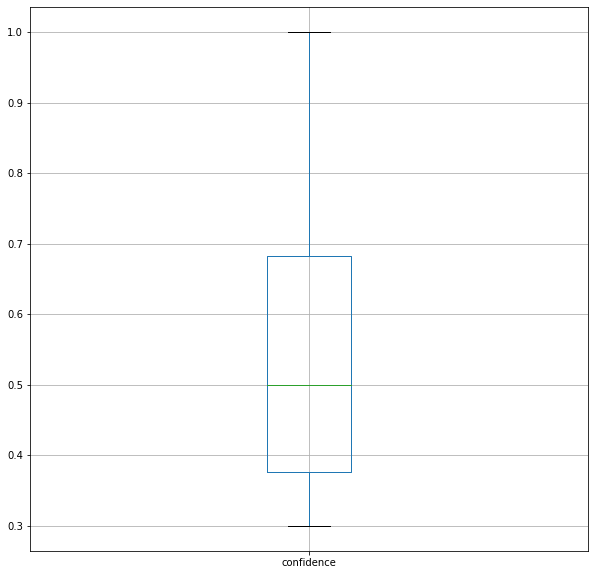

In [161]:
rules_c4[['confidence']].boxplot()

In [162]:
rules_l4 = association_rules(frequent_itemsets4, metric="lift", min_threshold=1)
rules_l4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mobile),(phone),0.114713,0.087282,0.049875,0.434783,4.981366,0.039863,1.614809
1,(phone),(mobile),0.087282,0.114713,0.049875,0.571429,4.981366,0.039863,2.065669
2,(mobile),(technology),0.114713,0.079800,0.014963,0.130435,1.634511,0.005808,1.058229
3,(technology),(mobile),0.079800,0.114713,0.014963,0.187500,1.634511,0.005808,1.089584
4,(mobile),(phones),0.114713,0.072319,0.057357,0.500000,6.913793,0.049061,1.855362
...,...,...,...,...,...,...,...,...,...
287,"(phones, phone)","(mobile, mobiles)",0.044888,0.039900,0.014963,0.333333,8.354167,0.013172,1.440150
288,(mobile),"(mobiles, phones, phone)",0.114713,0.014963,0.014963,0.130435,8.717391,0.013246,1.132793
289,(mobiles),"(mobile, phones, phone)",0.044888,0.039900,0.014963,0.333333,8.354167,0.013172,1.440150
290,(phones),"(mobile, mobiles, phone)",0.072319,0.017456,0.014963,0.206897,11.852217,0.013700,1.238859


In [163]:
rules_l4 = association_rules(frequent_itemsets4, metric="lift", min_threshold=1)
rules_l4.sort_values('lift', ascending = False, inplace = True)
rules_l4.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
267,"(nintendo, sony)",(handheld),0.019950,0.032419,0.017456,0.875000,26.990385,0.016810,7.740648
270,(handheld),"(nintendo, sony)",0.032419,0.019950,0.017456,0.538462,26.990385,0.016810,2.123441
273,"(nintendo, gaming)",(handheld),0.017456,0.032419,0.014963,0.857143,26.439560,0.014397,6.773067
276,(handheld),"(nintendo, gaming)",0.032419,0.017456,0.014963,0.461538,26.439560,0.014397,1.824724
269,(nintendo),"(handheld, sony)",0.039900,0.017456,0.017456,0.437500,25.062500,0.016760,1.746744
263,(nintendo),"(gaming, sony)",0.039900,0.012469,0.012469,0.312500,25.062500,0.011971,1.436409
242,"(programs, users)",(spyware),0.019950,0.029925,0.014963,0.750000,25.062500,0.014366,3.880299
268,"(handheld, sony)",(nintendo),0.017456,0.039900,0.017456,1.000000,25.062500,0.016760,inf
274,"(handheld, gaming)",(nintendo),0.014963,0.039900,0.014963,1.000000,25.062500,0.014366,inf
275,(nintendo),"(handheld, gaming)",0.039900,0.014963,0.014963,0.375000,25.062500,0.014366,1.576060


<AxesSubplot:>

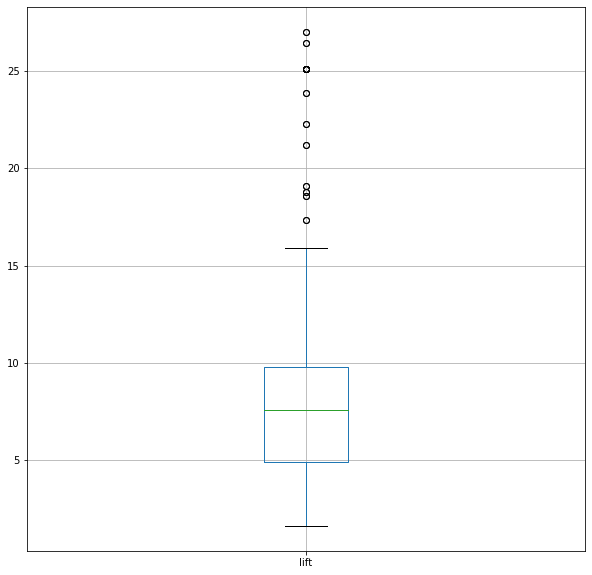

In [164]:
rules_l4[['lift']].boxplot()

In [165]:
# Option A
rules_c4[ (rules_c4['lift'] >= 25) &
       (rules_c4['confidence'] >= 0.50) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
142,"(gaming, sony)",(nintendo),0.012469,0.039900,0.012469,1.000000,25.062500,0.011971,inf
152,"(handheld, gaming)",(nintendo),0.014963,0.039900,0.014963,1.000000,25.062500,0.014366,inf
146,"(handheld, sony)",(nintendo),0.017456,0.039900,0.017456,1.000000,25.062500,0.016760,inf
145,"(nintendo, sony)",(handheld),0.019950,0.032419,0.017456,0.875000,26.990385,0.016810,7.740648
151,"(nintendo, gaming)",(handheld),0.017456,0.032419,0.014963,0.857143,26.439560,0.014397,6.773067
127,"(programs, users)",(spyware),0.019950,0.029925,0.014963,0.750000,25.062500,0.014366,3.880299
148,(handheld),"(nintendo, sony)",0.032419,0.019950,0.017456,0.538462,26.990385,0.016810,2.123441
131,(spyware),"(programs, users)",0.029925,0.019950,0.014963,0.500000,25.062500,0.014366,1.960100


In [166]:
rules_l4[ (rules_l4['lift'] >= 25) &
       (rules_l4['confidence'] >= 0.50) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
267,"(nintendo, sony)",(handheld),0.019950,0.032419,0.017456,0.875000,26.990385,0.016810,7.740648
270,(handheld),"(nintendo, sony)",0.032419,0.019950,0.017456,0.538462,26.990385,0.016810,2.123441
273,"(nintendo, gaming)",(handheld),0.017456,0.032419,0.014963,0.857143,26.439560,0.014397,6.773067
242,"(programs, users)",(spyware),0.019950,0.029925,0.014963,0.750000,25.062500,0.014366,3.880299
268,"(handheld, sony)",(nintendo),0.017456,0.039900,0.017456,1.000000,25.062500,0.016760,inf
274,"(handheld, gaming)",(nintendo),0.014963,0.039900,0.014963,1.000000,25.062500,0.014366,inf
247,(spyware),"(programs, users)",0.029925,0.019950,0.014963,0.500000,25.062500,0.014366,1.960100
262,"(gaming, sony)",(nintendo),0.012469,0.039900,0.012469,1.000000,25.062500,0.011971,inf


#### Keyword for Entertainment

In [167]:
e_top_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,386,386,386,386,386,386,386,386,386,386
unique,244,269,270,274,277,291,295,304,280,305
top,film,film,film,film,film,music,film,film,star,music
freq,20,21,10,27,9,8,8,6,9,6


In [168]:
e_full_list=pd.Series([])
for col in e_top_df:
    e_full_list = e_full_list.append(e_top_df[col].dropna())

C:\Users\koayy\AppData\Local\Temp/ipykernel_3300/4123923143.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  e_full_list=pd.Series([])


In [169]:
e_full_list

0           ocean
1            wars
2            film
3        dicaprio
4       carpenter
          ...    
381    atmosphere
382        series
383         stars
384         urged
385       perform
Length: 3860, dtype: object

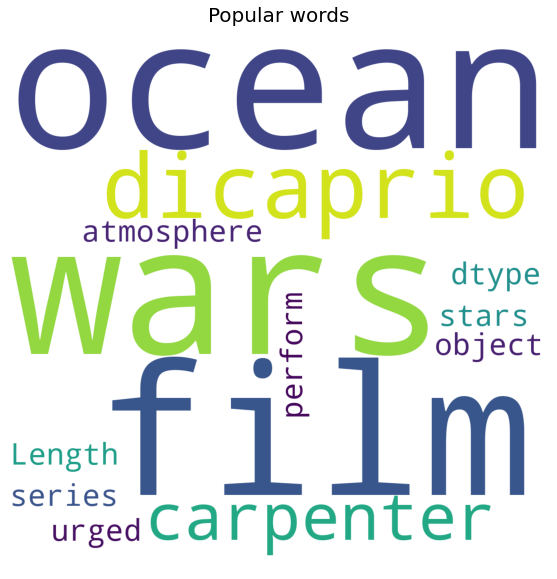

In [170]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 100).generate(str(e_full_list))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular words',fontsize = 20)
plt.show()

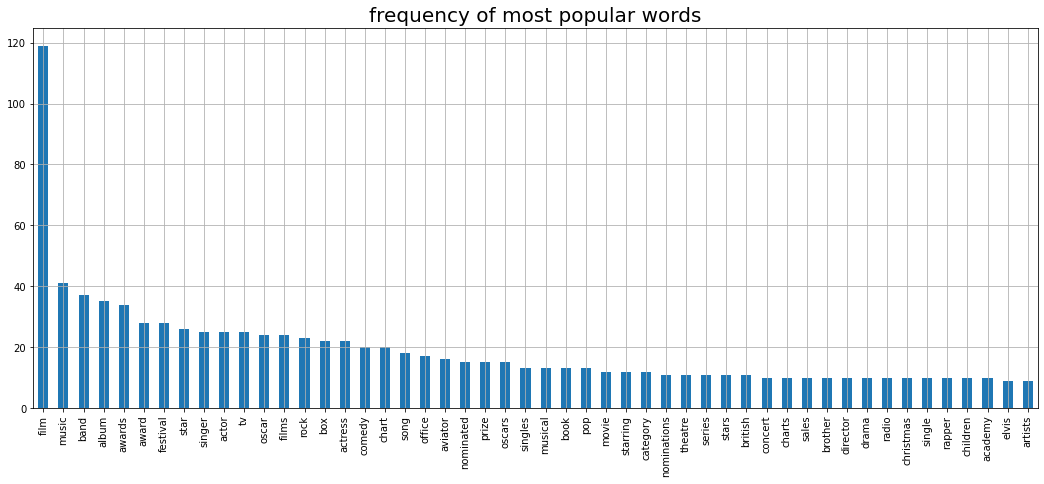

In [171]:
plt.figure(figsize=(18,7))
e_full_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular words', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [172]:
e_full_list.value_counts()

film          119
music          41
band           37
album          35
awards         34
             ... 
crime           1
official        1
violations      1
aware           1
urged           1
Length: 1408, dtype: int64

In [173]:
y5 = e_full_list.value_counts().head(50).to_frame()
y5.index

Index(['film', 'music', 'band', 'album', 'awards', 'award', 'festival', 'star',
       'singer', 'actor', 'tv', 'oscar', 'films', 'rock', 'box', 'actress',
       'comedy', 'chart', 'song', 'office', 'aviator', 'nominated', 'prize',
       'oscars', 'singles', 'musical', 'book', 'pop', 'movie', 'starring',
       'category', 'nominations', 'theatre', 'series', 'stars', 'british',
       'concert', 'charts', 'sales', 'brother', 'director', 'drama', 'radio',
       'christmas', 'single', 'rapper', 'children', 'academy', 'elvis',
       'artists'],
      dtype='object')

In [174]:
te = TransactionEncoder()
data_encoded5 = te.fit_transform(e_keylist)
data_encoded5 = pd.DataFrame(data_encoded5, columns = te.columns_)

data_encoded5.shape

(386, 1408)

In [175]:
data_encoded5

,abandoned,abc,absolute,abuse,ac,academy,achievement,act,action,activist,...,write,writer,writers,writing,written,wrote,yard,yen,york,youth
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
382,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
383,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
384,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [176]:
data_encoded5 = data_encoded5.loc[:, y5.index]
#y.index = the top 50 items

data_encoded5.shape

(386, 50)

In [177]:
data_encoded5.head()

,film,music,band,album,awards,award,festival,star,singer,actor,...,director,drama,radio,christmas,single,rapper,children,academy,elvis,artists
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [178]:
frequent_itemsets5=apriori(data_encoded5, min_support = 0.01, use_colnames = True)
frequent_itemsets5

,support,itemsets
0,0.308290,(film)
1,0.106218,(music)
2,0.095855,(band)
3,0.090674,(album)
4,0.088083,(awards)
...,...,...
153,0.012953,"(office, comedy, box)"
154,0.010363,"(singles, chart, charts)"
155,0.010363,"(singles, elvis, chart)"
156,0.015544,"(oscar, office, film, box)"


In [179]:
frequent_itemsets5[['support']].describe()
#base on 1%, have 158 items

,support
count,158.000000
mean,0.027350
std,0.029394
min,0.010363
25%,0.012953
50%,0.018135
75%,0.031088
max,0.308290


In [180]:
rules_c5 = association_rules(frequent_itemsets5, metric="confidence", min_threshold=0.3)
rules_c5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(awards),(film),0.088083,0.308290,0.036269,0.411765,1.335640,0.009114,1.175907
1,(award),(film),0.072539,0.308290,0.041451,0.571429,1.853541,0.019088,1.613990
2,(festival),(film),0.072539,0.308290,0.051813,0.714286,2.316927,0.029450,2.420984
3,(actor),(film),0.064767,0.308290,0.033679,0.520000,1.686723,0.013712,1.441062
4,(oscar),(film),0.062176,0.308290,0.044041,0.708333,2.297619,0.024873,2.371577
...,...,...,...,...,...,...,...,...,...
154,"(album, music)","(rock, band)",0.025907,0.031088,0.010363,0.400000,12.866667,0.009557,1.614853
155,"(album, rock)","(music, band)",0.023316,0.023316,0.010363,0.444444,19.061728,0.009819,1.758031
156,"(music, band)","(album, rock)",0.023316,0.023316,0.010363,0.444444,19.061728,0.009819,1.758031
157,"(rock, band)","(album, music)",0.031088,0.025907,0.010363,0.333333,12.866667,0.009557,1.461140


In [181]:
rules_c5.sort_values('confidence', ascending = False, inplace = True)
rules_c5.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
138,"(oscar, office, film)",(box),0.015544,0.056995,0.015544,1.0,17.545455,0.014658,inf
91,"(office, film)",(box),0.023316,0.056995,0.023316,1.0,17.545455,0.021987,inf
101,"(rock, music)",(band),0.015544,0.095855,0.015544,1.0,10.432432,0.014054,inf
151,"(album, rock, music)",(band),0.010363,0.095855,0.010363,1.0,10.432432,0.009369,inf
107,"(chart, music)",(singles),0.010363,0.033679,0.010363,1.0,29.692308,0.010014,inf
114,"(academy, awards)",(oscar),0.010363,0.062176,0.010363,1.0,16.083333,0.009718,inf
116,"(oscar, office)",(box),0.018135,0.056995,0.018135,1.0,17.545455,0.017101,inf
117,"(oscar, box)",(office),0.018135,0.044041,0.018135,1.0,22.705882,0.017336,inf
123,"(chart, rock)",(elvis),0.010363,0.023316,0.010363,1.0,42.888889,0.010121,inf
129,"(singles, charts)",(chart),0.010363,0.051813,0.010363,1.0,19.300000,0.009826,inf


<AxesSubplot:>

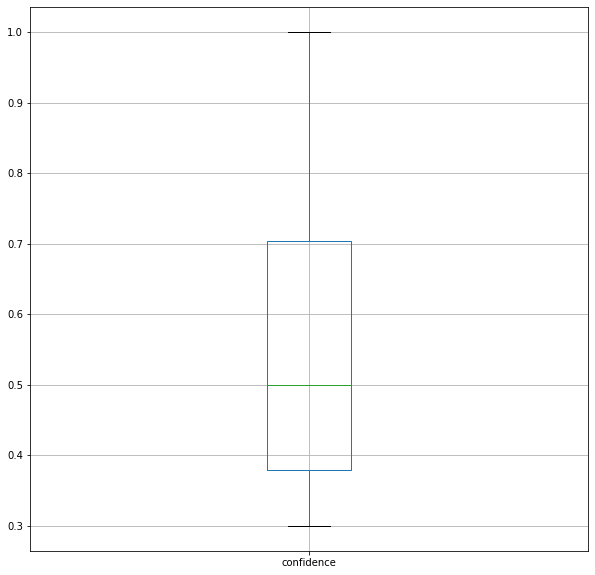

In [182]:
rules_c5[['confidence']].boxplot()

In [183]:
rules_l5 = association_rules(frequent_itemsets5, metric="lift", min_threshold=1)
rules_l5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(awards),(film),0.088083,0.308290,0.036269,0.411765,1.335640,0.009114,1.175907
1,(film),(awards),0.308290,0.088083,0.036269,0.117647,1.335640,0.009114,1.033506
2,(award),(film),0.072539,0.308290,0.041451,0.571429,1.853541,0.019088,1.613990
3,(film),(award),0.308290,0.072539,0.041451,0.134454,1.853541,0.019088,1.071533
4,(festival),(film),0.072539,0.308290,0.051813,0.714286,2.316927,0.029450,2.420984
...,...,...,...,...,...,...,...,...,...
309,"(rock, music)","(album, band)",0.015544,0.031088,0.010363,0.666667,21.444444,0.009879,2.906736
310,(album),"(music, band, rock)",0.090674,0.015544,0.010363,0.114286,7.352381,0.008953,1.111483
311,(band),"(album, rock, music)",0.095855,0.010363,0.010363,0.108108,10.432432,0.009369,1.109593
312,(music),"(album, rock, band)",0.106218,0.015544,0.010363,0.097561,6.276423,0.008712,1.090884


In [184]:
rules_l5 = association_rules(frequent_itemsets5, metric="lift", min_threshold=1)
rules_l5.sort_values('lift', ascending = False, inplace = True)
rules_l5.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
264,"(chart, rock)",(elvis),0.010363,0.023316,0.010363,1.000000,42.888889,0.010121,inf
265,(elvis),"(chart, rock)",0.023316,0.010363,0.010363,0.444444,42.888889,0.010121,1.781347
292,"(oscar, box)","(office, film)",0.018135,0.023316,0.015544,0.857143,36.761905,0.015121,6.836788
293,"(office, film)","(oscar, box)",0.023316,0.018135,0.015544,0.666667,36.761905,0.015121,2.945596
251,"(oscar, awards)",(academy),0.012953,0.025907,0.010363,0.800000,30.880000,0.010027,4.870466
254,(academy),"(oscar, awards)",0.025907,0.012953,0.010363,0.400000,30.880000,0.010027,1.645078
241,(singles),"(chart, music)",0.033679,0.010363,0.010363,0.307692,29.692308,0.010014,1.429476
277,(singles),"(chart, charts)",0.033679,0.010363,0.010363,0.307692,29.692308,0.010014,1.429476
276,"(chart, charts)",(singles),0.010363,0.033679,0.010363,1.000000,29.692308,0.010014,inf
240,"(chart, music)",(singles),0.010363,0.033679,0.010363,1.000000,29.692308,0.010014,inf


<AxesSubplot:>

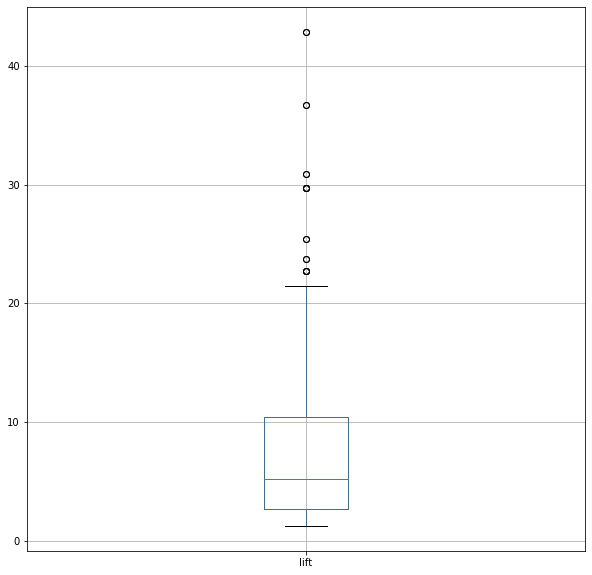

In [185]:
rules_l5[['lift']].boxplot()

In [186]:
# Option A
rules_c5[ (rules_c5['lift'] >= 25) &
       (rules_c5['confidence'] >= 0.50) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
107,"(chart, music)",(singles),0.010363,0.033679,0.010363,1.000000,29.692308,0.010014,inf
123,"(chart, rock)",(elvis),0.010363,0.023316,0.010363,1.000000,42.888889,0.010121,inf
130,"(chart, charts)",(singles),0.010363,0.033679,0.010363,1.000000,29.692308,0.010014,inf
142,"(oscar, office)","(film, box)",0.018135,0.033679,0.015544,0.857143,25.450549,0.014933,6.764249
144,"(oscar, box)","(office, film)",0.018135,0.023316,0.015544,0.857143,36.761905,0.015121,6.836788
113,"(oscar, awards)",(academy),0.012953,0.025907,0.010363,0.800000,30.880000,0.010027,4.870466
145,"(office, film)","(oscar, box)",0.023316,0.018135,0.015544,0.666667,36.761905,0.015121,2.945596


In [187]:
rules_l5[ (rules_l5['lift'] >= 25) &
       (rules_l5['confidence'] >= 0.50) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
264,"(chart, rock)",(elvis),0.010363,0.023316,0.010363,1.000000,42.888889,0.010121,inf
292,"(oscar, box)","(office, film)",0.018135,0.023316,0.015544,0.857143,36.761905,0.015121,6.836788
293,"(office, film)","(oscar, box)",0.023316,0.018135,0.015544,0.666667,36.761905,0.015121,2.945596
251,"(oscar, awards)",(academy),0.012953,0.025907,0.010363,0.800000,30.880000,0.010027,4.870466
276,"(chart, charts)",(singles),0.010363,0.033679,0.010363,1.000000,29.692308,0.010014,inf
240,"(chart, music)",(singles),0.010363,0.033679,0.010363,1.000000,29.692308,0.010014,inf
290,"(oscar, office)","(film, box)",0.018135,0.033679,0.015544,0.857143,25.450549,0.014933,6.764249
